With replacement (Simulated): 4.9002
With replacement (Theoretical): 4.900995010000009
Without replacement (Always 5): 5.0
P(Q2 | Q1 selected) Simulated: 0.04883227176220807
P(Q2 | Q1 selected) Theoretical: 0.04900995010000009
Bayes Theorem (Simulated): 0.4912038131970091
Bayes Theorem (Theoretical): 0.4909090909090909


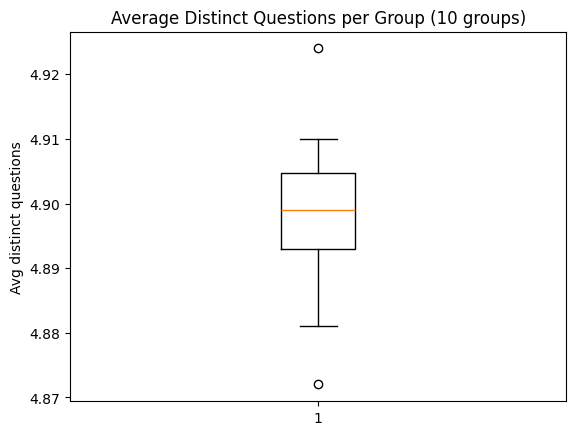

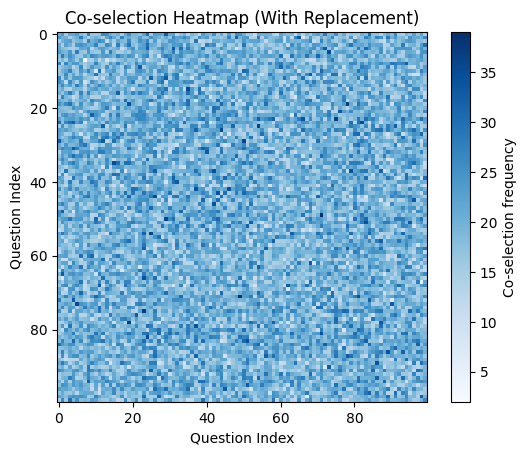

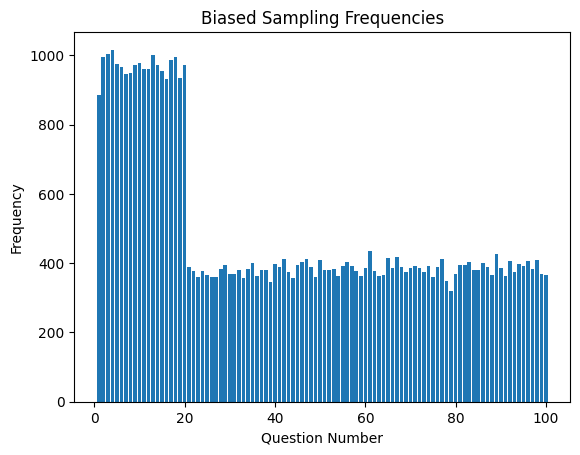

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Question bank
questions = np.array([f"Q{i}" for i in range(1, 101)])

# (a) With replacement
def select_with_replacement():
    return np.random.choice(questions, size=5, replace=True)

# (b) Without replacement
def select_without_replacement():
    return np.random.choice(questions, size=5, replace=False)

n_tests = 10000

# With replacement
tests_with = [select_with_replacement() for _ in range(n_tests)]
counts_with = Counter(np.concatenate(tests_with))

# Without replacement
tests_without = [select_without_replacement() for _ in range(n_tests)]
counts_without = Counter(np.concatenate(tests_without))

# Simulated
unique_counts_with = [len(set(t)) for t in tests_with]
avg_unique_with = np.mean(unique_counts_with)

# Theoretical
theoretical_with = 100 * (1 - (99/100)**5)

# Without replacement
unique_counts_without = [len(set(t)) for t in tests_without]
avg_unique_without = np.mean(unique_counts_without)

print("With replacement (Simulated):", avg_unique_with)
print("With replacement (Theoretical):", theoretical_with)
print("Without replacement (Always 5):", avg_unique_without)

count_Q1 = sum("Q1" in t for t in tests_with)
count_Q1Q2 = sum(("Q1" in t) and ("Q2" in t) for t in tests_with)
cond_prob_sim = count_Q1Q2 / count_Q1
theoretical_cond = 1 - (99/100)**5

print("P(Q2 | Q1 selected) Simulated:", cond_prob_sim)
print("P(Q2 | Q1 selected) Theoretical:", theoretical_cond)

# Theoretical
pE, pH = 0.3, 0.7
pC_E, pC_H = 0.9, 0.4
pC = pC_E * pE + pC_H * pH
theoretical_bayes = (pC_E * pE) / pC

# Simulation
n_trials = 100000
labels = np.array(["E"]*30 + ["H"]*70)

correct = 0
easy_and_correct = 0
for _ in range(n_trials):
    q = np.random.choice(labels)
    ans_correct = (np.random.rand() < 0.9) if q == "E" else (np.random.rand() < 0.4)
    
    if ans_correct:
        correct += 1
        if q == "E":
            easy_and_correct += 1

sim_bayes = easy_and_correct / correct

print("Bayes Theorem (Simulated):", sim_bayes)
print("Bayes Theorem (Theoretical):", theoretical_bayes)

group_avgs = []
for _ in range(10):
    group = [len(set(select_with_replacement())) for _ in range(1000)]
    group_avgs.append(np.mean(group))

plt.boxplot(group_avgs)
plt.title("Average Distinct Questions per Group (10 groups)")
plt.ylabel("Avg distinct questions")
plt.show()

matrix = np.zeros((100, 100))

for t in tests_with:
    for i in range(5):
        for j in range(i+1, 5):
            qi = int(t[i][1:]) - 1
            qj = int(t[j][1:]) - 1
            matrix[qi, qj] += 1
            matrix[qj, qi] += 1

plt.imshow(matrix, cmap="Blues", interpolation="nearest")
plt.colorbar(label="Co-selection frequency")
plt.title("Co-selection Heatmap (With Replacement)")
plt.xlabel("Question Index")
plt.ylabel("Question Index")
plt.show()

def biased_selection():
    probs = np.array([0.02]*20 + [0.008]*80)   # Higher chance for Q1–Q20
    probs /= probs.sum()
    return np.random.choice(questions, size=5, replace=True, p=probs)

biased_tests = [biased_selection() for _ in range(n_tests)]
biased_counts = Counter(np.concatenate(biased_tests))

# Plot histogram
plt.bar(range(1, 101), [biased_counts[f"Q{i}"] for i in range(1, 101)])
plt.title("Biased Sampling Frequencies")
plt.xlabel("Question Number")
plt.ylabel("Frequency")
plt.show()


119
[ 0  0  0  0  0  0  0 11 14  8  4  4  5  5  3  5  0 17 10 12 13  1  6  1]
[ 5.9029813   7.38195438  4.74840665 26.46836798  6.61840499  4.9470426
 11.73610625  2.27847222 24.30725394  1.16213803 65.01219509 22.19225664
  3.32309161  0.08306131 25.34845166 18.40643861 19.58494363 22.12821789
  1.15393898  6.65839009  1.84725157 29.82794357 14.64451788  6.02728202
  0.98502099  5.58732526  5.8997132  19.61813676 15.22334038 32.73377869
  9.585992    1.9105859  18.73689516 21.4558913  12.35831242 22.1083495
 10.21222097 11.09518258  8.36721291  0.38621661  1.71251153  0.47900522
 15.17594326  5.66095063 10.65655766 35.71898295  4.30108234  7.92422962
 21.13123721  3.89707735  1.20156418  5.13210456  2.63712538 39.82425129
 24.76330621 15.05241286 30.77279596 24.41953411  3.09743215 33.46220108
 11.62649853 24.71022437 33.96363974  5.74096075  1.7488824   3.88030119
  8.35586539 25.5574459  29.57017458  0.10464614 10.72314239  8.10409981
  3.76751007  1.91520587  6.1786287  42.94681684

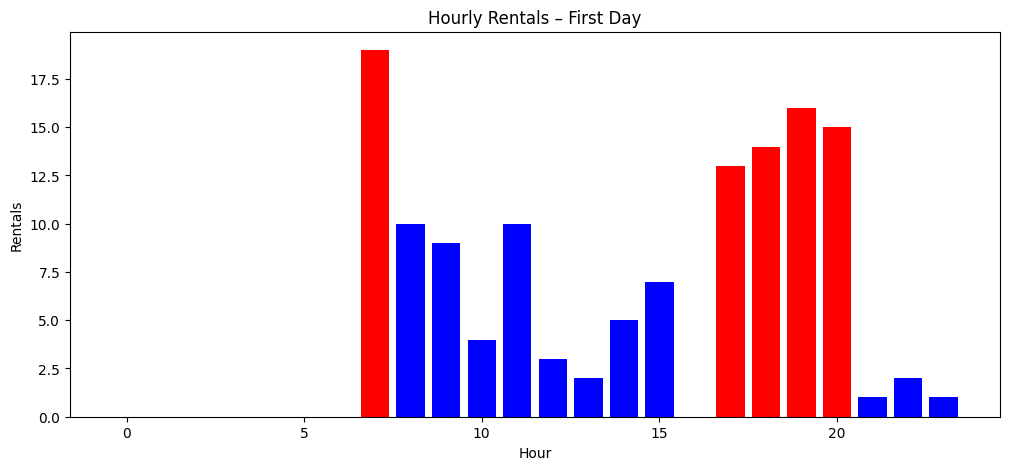

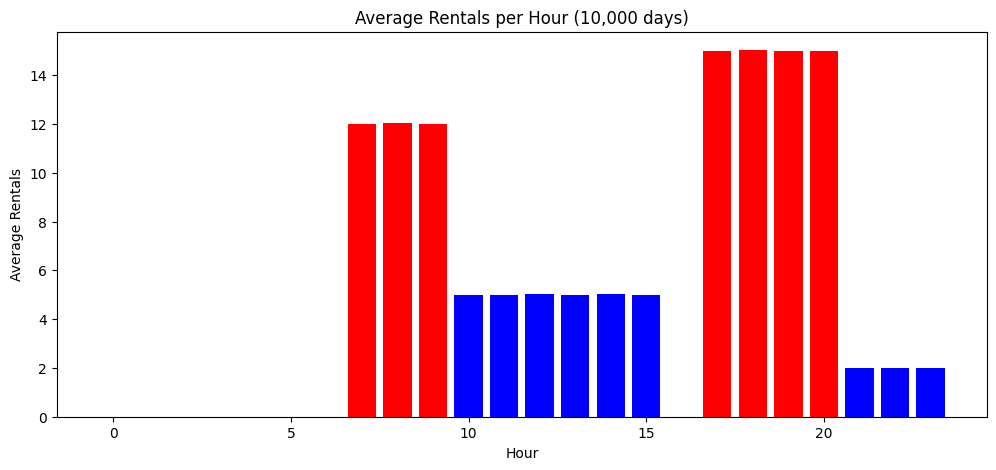

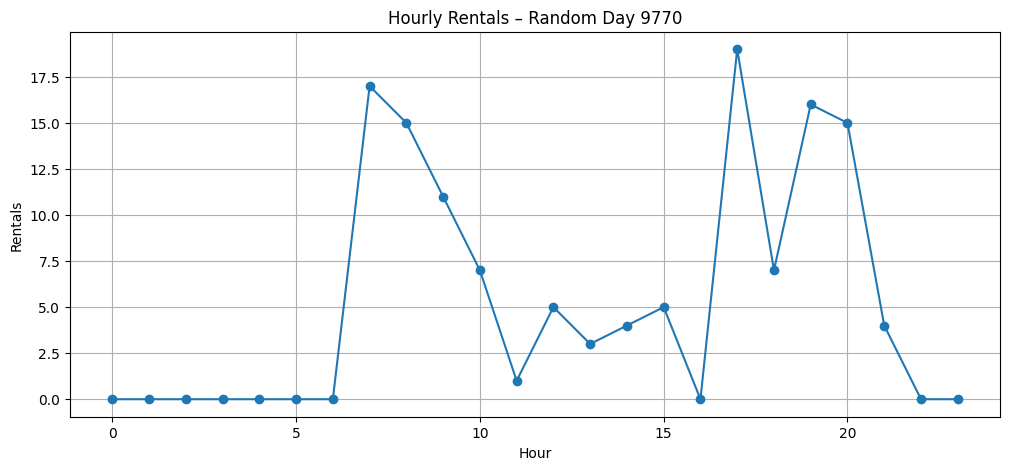

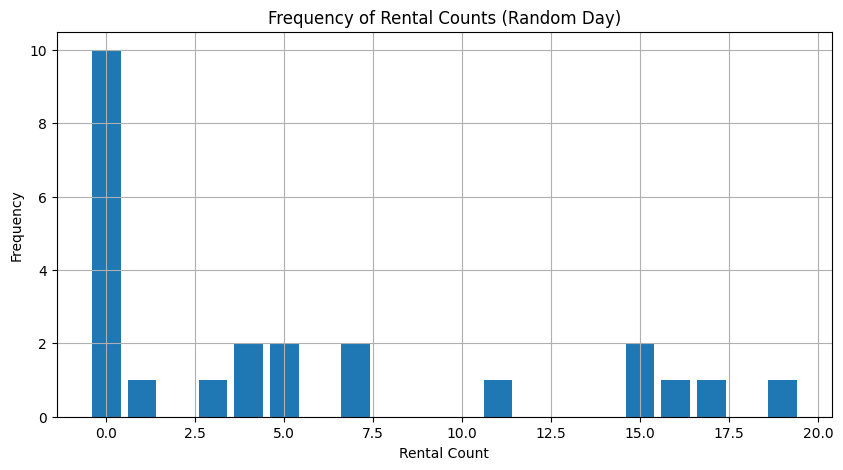

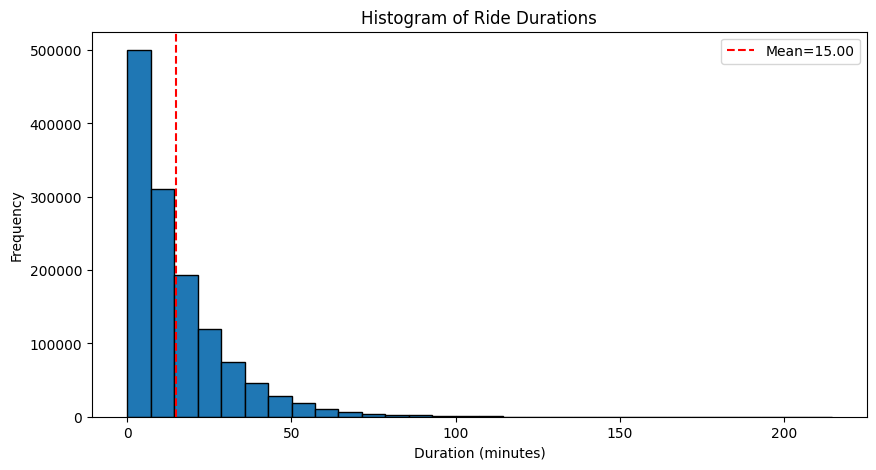

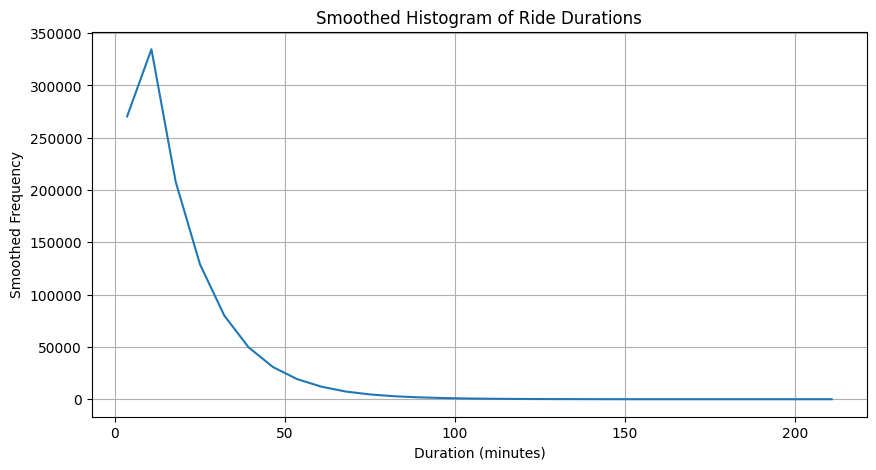

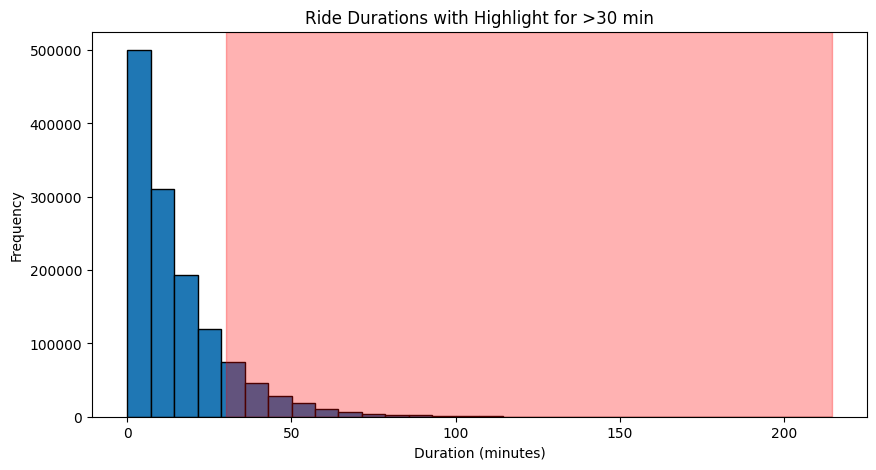


================== RESULTS ==================

Probability hour has >10 rentals: 0.2318
First-day maximum rentals = 19 at hour(s) [7]
Probability of seeing that maximum value: 0.011700
Probability ride duration > 30 min: 0.1353
Probability 20–25 min duration: 0.0747
Mean ride duration: 14.9974
Variance of ride duration: 224.9980




In [13]:
# ------------------------------------------------------------
#  BIKE RENTAL FORECASTING – FULL SOLUTION
# ------------------------------------------------------------
# Performs:
# 1. Data Generation (Random, Poisson, Manual CSV)
# 2. 10,000-day Simulation using Poisson + Exponential
# 3. Probability Estimation
# 4. Ride Duration Metrics
# 5. All Required Visualizations
# ------------------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For consistent results
np.random.seed(42)

# ------------------------------------------------------------
# PART 1 — DATA GENERATION
# ------------------------------------------------------------

# (a) Random Assignment Method
def generate_random_dataset():
    hourly = np.random.randint(0, 16, size=24)     # rentals 0–15
    durations = [np.random.randint(5, 61)          # durations 5–60 mins
                 for _ in range(hourly.sum())]
    print(durations)
    return hourly, np.array(durations)




# (b) Statistical Simulation Method (Poisson + Exponential)
def generate_statistical_dataset():
    mu = np.zeros(24)

    mu[7:10] = 12     # morning peak 7–9 am
    mu[10:16] = 5     # midday 10 am – 3 pm
    mu[17:21] = 15    # evening peak 5–8 pm
    mu[21:24] = 2     # night 9 pm onward

    hourly = np.random.poisson(mu)
    total = hourly.sum()

    durations = np.random.exponential(scale=15, size=total)
    print(total)
    print(hourly)
    print(durations)
    return hourly, durations

generate_statistical_dataset()

# (c) Manual CSV method
def read_csv_dataset(path):
    df = pd.read_csv(path)
    hourly = df["rentals"].values
    durations = df["durations"].dropna().values
    return hourly, durations


# # ------------------------------------------------------------
# # PART 2 — 10,000 DAY SIMULATION (USING Poisson + Exponential)
# # ------------------------------------------------------------

DAYS = 10000
mu = np.zeros(24)

mu[7:10] = 12
mu[10:16] = 5
mu[17:21] = 15
mu[21:24] = 2

all_hours = []
all_durations = []
hourly_matrix = np.zeros((DAYS, 24), dtype=int)

for d in range(DAYS):
    hourly = np.random.poisson(mu)
    hourly_matrix[d] = hourly

    total_today = hourly.sum()
    durations_today = np.random.exponential(scale=15, size=total_today)

    all_hours.extend(hourly)
    all_durations.extend(durations_today)

all_hours = np.array(all_hours)
all_durations = np.array(all_durations)

print(all_hours)
print(all_durations)

# ------------------------------------------------------------
# PART 3 — PROBABILITY ESTIMATION
# ------------------------------------------------------------

# 2(a) Probability a random hour has >10 rentals
prob_gt10 = np.mean(all_hours > 10)

# 2(b) Hour with maximum rentals on Day 1
first_day = hourly_matrix[0]
max_val = first_day.max()
max_hour = np.where(first_day == max_val)[0]

# 2(c) Probability of observing “max_val” anywhere across all days
prob_observe_max = np.mean(all_hours == max_val)

# 2(d) P(ride duration > 30)
prob_dur_gt30 = np.mean(all_durations > 30)

# 2(e) P(20 ≤ duration ≤ 25)
prob_dur_20_25 = np.mean((all_durations >= 20) & (all_durations <= 25))


# ------------------------------------------------------------
# PART 4 — METRICS
# ------------------------------------------------------------

mean_duration = all_durations.mean()
var_duration = all_durations.var()


# ------------------------------------------------------------
# PART 5 — VISUALIZATION
# ------------------------------------------------------------

# (4a) First day bar chart, highlight >10
plt.figure(figsize=(12,5))
colors = ['red' if x > 10 else 'blue' for x in first_day]
plt.bar(range(24), first_day, color=colors)
plt.title("Hourly Rentals – First Day")
plt.xlabel("Hour")
plt.ylabel("Rentals")
plt.show()

# (4b) Average rentals per hour across all days
avg_hours = hourly_matrix.mean(axis=0)
colors = ['red' if x > 10 else 'blue' for x in avg_hours]

plt.figure(figsize=(12,5))
plt.bar(range(24), avg_hours, color=colors)
plt.title("Average Rentals per Hour (10,000 days)")
plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.show()

# (4c) Line plot for a randomly chosen day
rand_day = np.random.randint(0, DAYS)
plt.figure(figsize=(12,5))
plt.plot(hourly_matrix[rand_day], marker='o')
plt.title(f"Hourly Rentals – Random Day {rand_day}")
plt.xlabel("Hour")
plt.ylabel("Rentals")
plt.grid(True)
plt.show()

# (4d) Frequency of rental counts for that day
plt.figure(figsize=(10,5))
vals, counts = np.unique(hourly_matrix[rand_day], return_counts=True)
plt.bar(vals, counts)
plt.title("Frequency of Rental Counts (Random Day)")
plt.xlabel("Rental Count")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# (4e) Histogram of all ride durations
plt.figure(figsize=(10,5))
plt.hist(all_durations, bins=30, edgecolor='black')
plt.axvline(mean_duration, color='red', linestyle='--', label=f'Mean={mean_duration:.2f}')
plt.title("Histogram of Ride Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# (4f) Smoothed histogram (using moving average of histogram)
hist, bin_edges = np.histogram(all_durations, bins=30)
smooth = np.convolve(hist, np.ones(3)/3, mode='same')

plt.figure(figsize=(10,5))
plt.plot((bin_edges[:-1] + bin_edges[1:]) / 2, smooth)
plt.title("Smoothed Histogram of Ride Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Smoothed Frequency")
plt.grid(True)
plt.show()

# (4g) Highlight durations >30
plt.figure(figsize=(10,5))
plt.hist(all_durations, bins=30, edgecolor='black')
plt.axvspan(30, all_durations.max(), alpha=0.3, color='red')
plt.title("Ride Durations with Highlight for >30 min")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


# ------------------------------------------------------------
# PRINT RESULTS
# ------------------------------------------------------------

print("\n================== RESULTS ==================\n")
print(f"Probability hour has >10 rentals: {prob_gt10:.4f}")
print(f"First-day maximum rentals = {max_val} at hour(s) {max_hour.tolist()}")
print(f"Probability of seeing that maximum value: {prob_observe_max:.6f}")
print(f"Probability ride duration > 30 min: {prob_dur_gt30:.4f}")
print(f"Probability 20–25 min duration: {prob_dur_20_25:.4f}")
print(f"Mean ride duration: {mean_duration:.4f}")
print(f"Variance of ride duration: {var_duration:.4f}")
print("\n=============================================\n")


In [4]:
# ============================================================
#   WEBSITE SESSION ANALYSIS (BINOMIAL + NORMAL + DATASET)
# ============================================================

import numpy as np
import pandas as pd
from scipy.stats import binom, norm

# ============================================================
#   CONFIGURATION (adapted for your dataset)
# ============================================================
DATA_FILE = "website_wata.csv"     # <-- change if needed
BOUNCE_COL = "Bounce Rate"
CONV_COL = "Conversion Rate"

# ============================================================
#   LOAD DATASET
# ============================================================
df = pd.read_csv(DATA_FILE)
print("Columns:", df.columns)
print("Total rows:", len(df))

# Convert Bounce Rate to numeric if in %
def fix_percent(x):
    if isinstance(x, str) and x.endswith('%'):
        return float(x.replace('%', ''))
    return float(x)

df[BOUNCE_COL] = df[BOUNCE_COL].apply(fix_percent)

# Convert Conversion Rate to numeric
df[CONV_COL] = df[CONV_COL].apply(fix_percent)

# ============================================================
#   PART 1: BINOMIAL TASKS
# ============================================================

print("\n================ BINOMIAL TASKS ================")

# 1. P(X = 10) for n=50, p=0.2
p1 = binom.pmf(10, 50, 0.2)
print("1. P(exactly 10 conversions out of 50):", p1)

# 2. P(X >= 25) for n=50, p=0.2
p2 = binom.sf(24, 50, 0.2)
print("2. P(at least 25 conversions out of 50):", p2)

# 3. Most engaged 10% = lowest bounce
N = len(df)
top10 = int(0.1 * N)
df_sorted = df.sort_values(BOUNCE_COL)
most_engaged = df_sorted.head(top10)
rest = df_sorted.tail(N - top10)

print(f"3. Most-engaged 10% represent: {top10/N:.4f} of all sessions")

# 4. Conversion rate comparison
conv_most = most_engaged[CONV_COL].mean()
conv_rest = rest[CONV_COL].mean()

print(f"4. Conversion rate (top 10% engaged): {conv_most:.4f}")
print(f"   Conversion rate (remaining 90%): {conv_rest:.4f}")
print(f"   Difference: {conv_most - conv_rest:.4f}")

# 5. Normal approx: P(X > 50), n=200, p=0.2
n = 200
p = 0.2
mu = n * p
sigma = np.sqrt(n * p * (1 - p))

z = (50.5 - mu) / sigma
p5 = 1 - norm.cdf(z)

print("5. Normal approx P(X > 50):", p5)

# ============================================================
#   PART 2: NORMAL DISTRIBUTION TASKS
# ============================================================

print("\n================ NORMAL DISTRIBUTION TASKS ================")

# 1. P(X > 8) for N(5,2)
p6 = 1 - norm.cdf(8, 5, 2)
print("1. P(duration > 8):", p6)

# 2. P(2 < X < 4.5) for N(3,1.2)
p7 = norm.cdf(4.5, 3, 1.2) - norm.cdf(2, 3, 1.2)
print("2. P(2 < time on page < 4.5):", p7)

# 3. P(mean > 5) pages viewed, n=30, N(4,1.5)
sigma_xbar = 1.5 / np.sqrt(30)
z = (5 - 4) / sigma_xbar
p8 = 1 - norm.cdf(z)
print("3. P(mean pages viewed > 5):", p8)

# 4. Organic > Paid
mu1, sd1 = 5.2, 1.8
mu2, sd2 = 4.7, 2.0

muD = mu1 - mu2
sdD = np.sqrt(sd1**2 + sd2**2)

p9 = 1 - norm.cdf(0, muD, sdD)
print("4. P(Organic duration > Paid duration):", p9)

# 5. P(previous visits >= 5), N(3,1.5)
p10 = 1 - norm.cdf(5, 3, 1.5)
print("5. P(previous visits >= 5):", p10)

# 6. P(sample mean < 4.5), n=40, N(5,2)
sigma_xbar2 = 2 / np.sqrt(40)
p11 = norm.cdf(4.5, 5, sigma_xbar2)
print("6. P(sample mean duration < 4.5):", p11)

# ============================================================
#   DONE
# ============================================================

print("\nALL COMPUTATIONS COMPLETE.")


Columns: Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')
Total rows: 2000

================ BINOMIAL TASKS ================
1. P(exactly 10 conversions out of 50): 0.1398190051743156
2. P(at least 25 conversions out of 50): 2.094854855528926e-06
3. Most-engaged 10% represent: 0.1000 of all sessions
4. Conversion rate (top 10% engaged): 0.9815
   Conversion rate (remaining 90%): 0.9821
   Difference: -0.0006
5. Normal approx P(X > 50): 0.031715712644305616

================ NORMAL DISTRIBUTION TASKS ================
1. P(duration > 8): 0.06680720126885809
2. P(2 < time on page < 4.5): 0.6920218453695015
3. P(mean pages viewed > 5): 0.00013036481642769715
4. P(Organic duration > Paid duration): 0.5737084267593762
5. P(previous visits >= 5): 0.09121121972586788
6. P(sample mean duration < 4.5): 0.056923149003329024

ALL COMPUTATIONS COMPLETE.


Missing-value imputation completed.

Mean Vector (Glucose, BMI):
 [121.68670272  32.45699674]

Covariance Matrix:
 [[926.34703305  48.34438233]
 [ 48.34438233  47.26783056]]


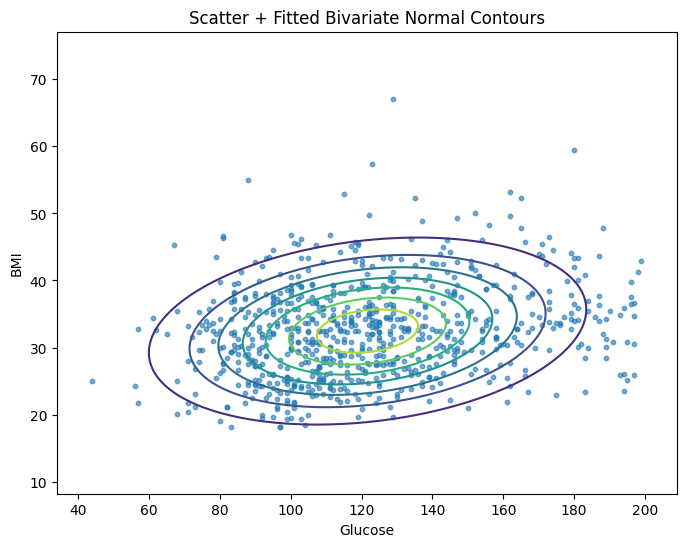

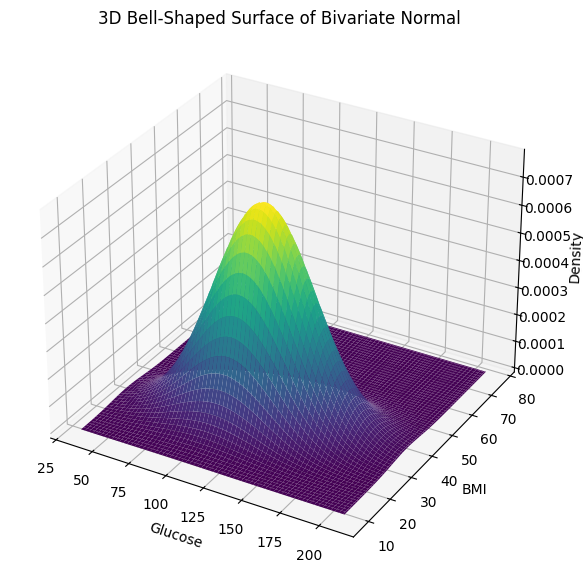

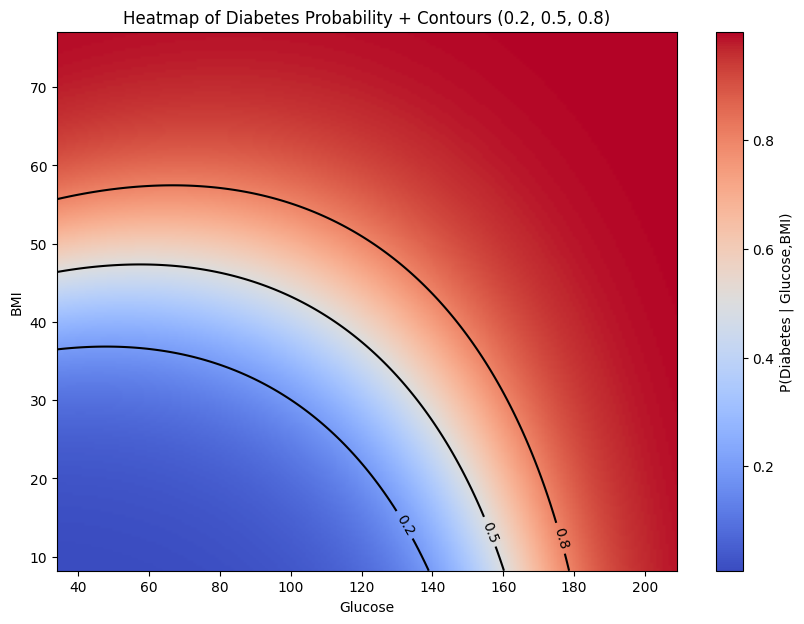

In [7]:
# -------------------------------------------------------
# Import Libraries
# -------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# -------------------------------------------------------
# 1. Load Dataset (Pima Indians Diabetes Dataset)
# -------------------------------------------------------
df = pd.read_csv("diabetes.csv")   # change filename if needed

# Columns with biologically impossible zeros
cols_with_zero_missing = ["Glucose", "BloodPressure", "SkinThickness", 
                          "Insulin", "BMI"]

# -------------------------------------------------------
# 1. Data Cleaning — Replace anomalies with mean + noise
# -------------------------------------------------------
for col in cols_with_zero_missing:
    mean_val = df[col].replace(0, np.nan).mean()
    noise = np.random.normal(0, 0.1, size=len(df))  # very small sd
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(mean_val + pd.Series(noise, index=df.index))

print("Missing-value imputation completed.\n")

# -------------------------------------------------------
# 2. Bivariate Normal Analysis for Glucose and BMI
# -------------------------------------------------------

X = df["Glucose"].values
Y = df["BMI"].values
data = np.vstack((X, Y)).T

# (a) Mean vector & covariance matrix
mean_vec = np.mean(data, axis=0)
cov_mat = np.cov(data.T)

print("Mean Vector (Glucose, BMI):\n", mean_vec)
print("\nCovariance Matrix:\n", cov_mat)

# -------------------------------------------------------
# (b) Scatter Plot + Contour Lines of Bivariate Normal
# -------------------------------------------------------
rv = multivariate_normal(mean_vec, cov_mat)

# grid for contour
x = np.linspace(min(X)-10, max(X)+10, 200)
y = np.linspace(min(Y)-10, max(Y)+10, 200)
Xg, Yg = np.meshgrid(x, y)
pos = np.dstack((Xg, Yg))
Z = rv.pdf(pos)

plt.figure(figsize=(8,6))
plt.scatter(X, Y, s=10, alpha=0.6, label="Data")
plt.contour(Xg, Yg, Z, cmap="viridis")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Scatter + Fitted Bivariate Normal Contours")
plt.show()
# -------------------------------------------------------
# (c) 3D Surface Plot of the Bivariate Normal PDF
# -------------------------------------------------------
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(Xg, Yg, Z, rstride=3, cstride=3, linewidth=0,
                antialiased=True, cmap="viridis")

ax.set_xlabel("Glucose")
ax.set_ylabel("BMI")
ax.set_zlabel("Density")
ax.set_title("3D Bell-Shaped Surface of Bivariate Normal")
plt.show()

# -------------------------------------------------------
# 3. Conditional Probability of Diabetes
# -------------------------------------------------------

# We assume:
#   P(D=1 | x,y) ∝ f(x,y | D=1)
#   P(D=0 | x,y) ∝ f(x,y | D=0)

df1 = df[df["Outcome"] == 1]   # diabetic
df0 = df[df["Outcome"] == 0]   # non-diabetic

mean1 = np.mean(df1[["Glucose", "BMI"]].values, axis=0)
cov1  = np.cov(df1[["Glucose", "BMI"]].values.T)

mean0 = np.mean(df0[["Glucose", "BMI"]].values, axis=0)
cov0  = np.cov(df0[["Glucose", "BMI"]].values.T)

rv1 = multivariate_normal(mean1, cov1)
rv0 = multivariate_normal(mean0, cov0)

# Grid for probability evaluation
Px = Xg
Py = Yg
pos_grid = np.dstack((Px, Py))

# Likelihoods
L1 = rv1.pdf(pos_grid)
L0 = rv0.pdf(pos_grid)

# Posterior Probability:
P_d1 = L1 / (L1 + L0)

# -------------------------------------------------------
# 3(b) Heatmap + Contour Lines
# -------------------------------------------------------
plt.figure(figsize=(10,7))
plt.imshow(P_d1, extent=[x.min(), x.max(), y.min(), y.max()],
           origin="lower", cmap="coolwarm", aspect="auto")
plt.colorbar(label="P(Diabetes | Glucose,BMI)")

# Contour lines for fixed levels
CS = plt.contour(Xg, Yg, P_d1, levels=[0.2, 0.5, 0.8], colors="black")
plt.clabel(CS, inline=True, fontsize=10)

plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Heatmap of Diabetes Probability + Contours (0.2, 0.5, 0.8)")
plt.show()


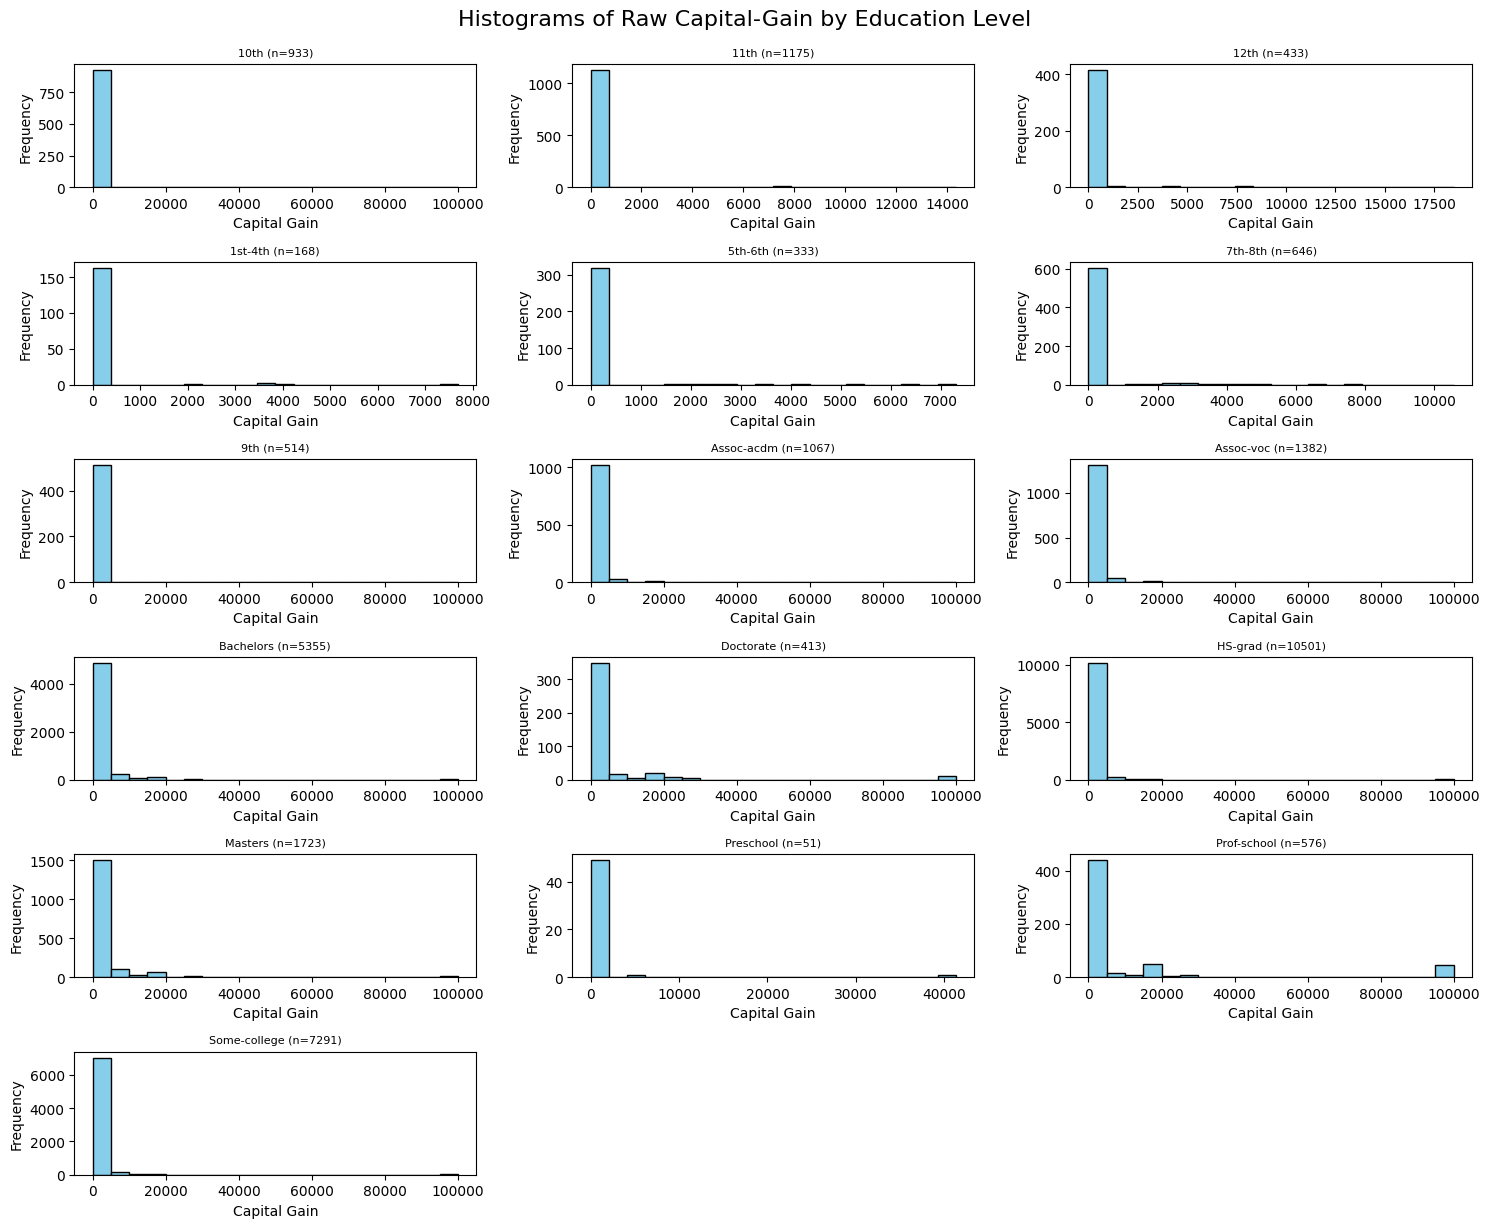

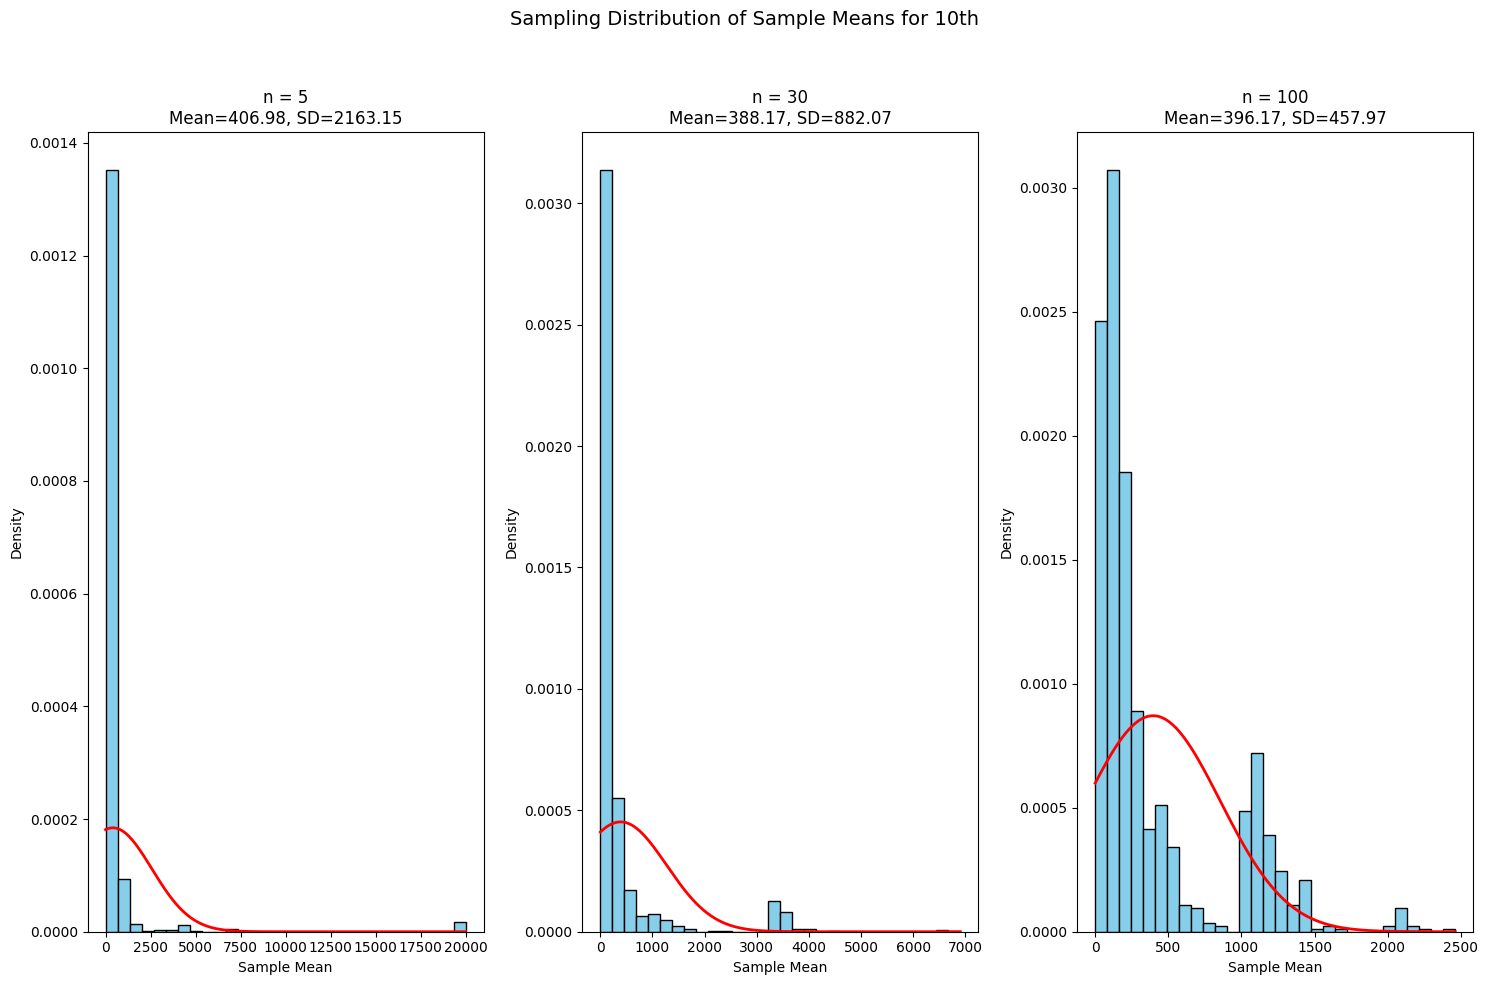

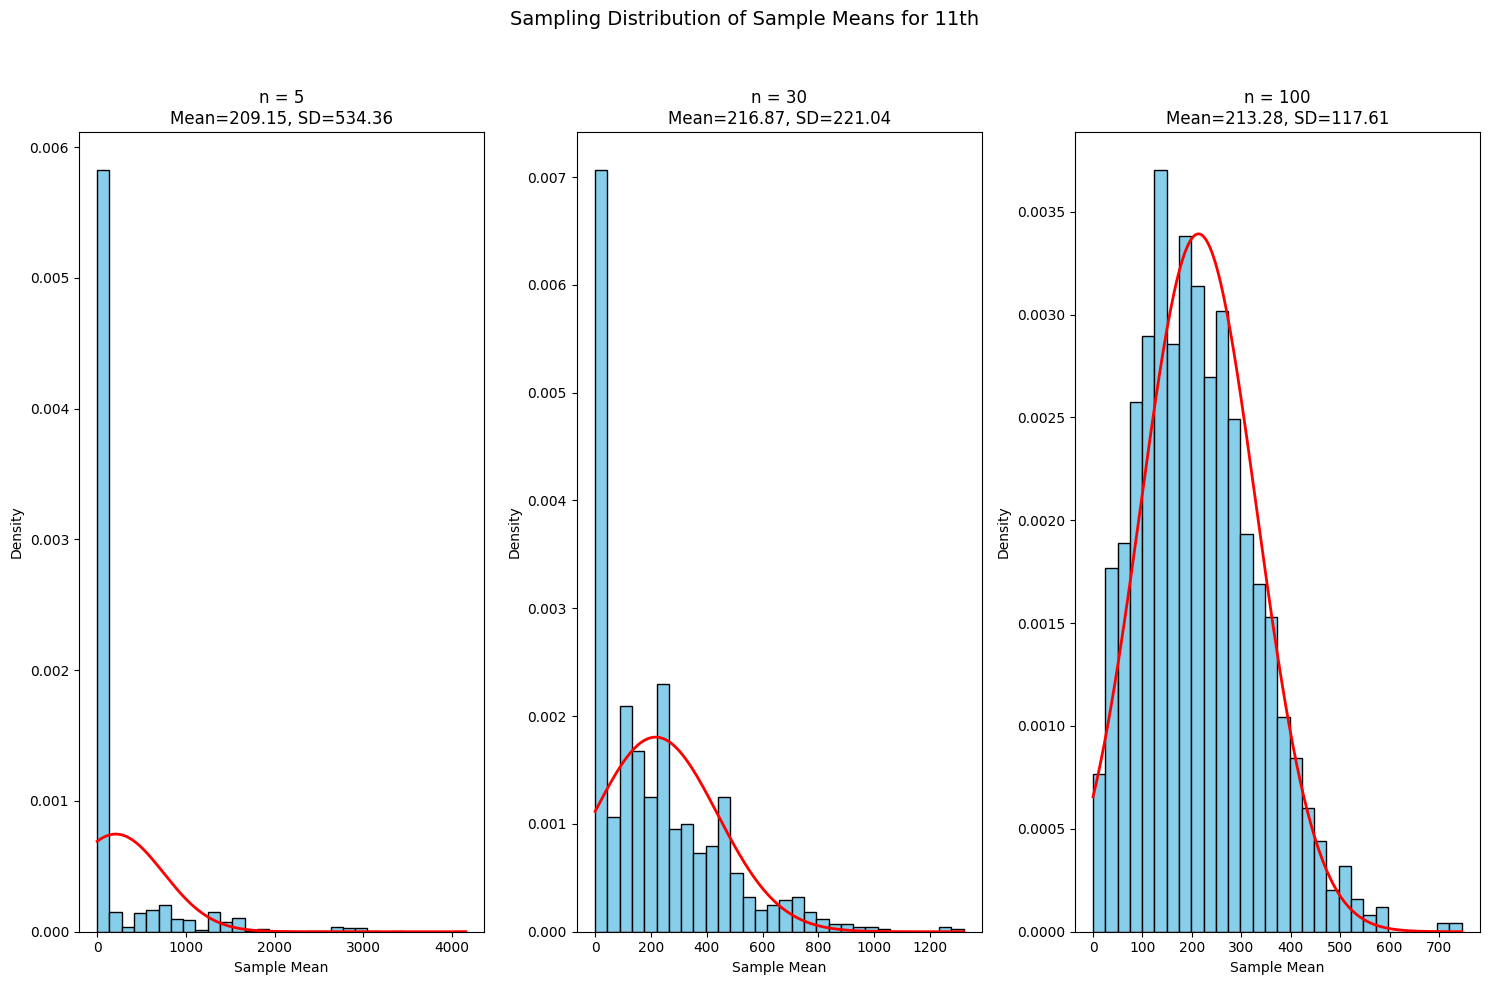

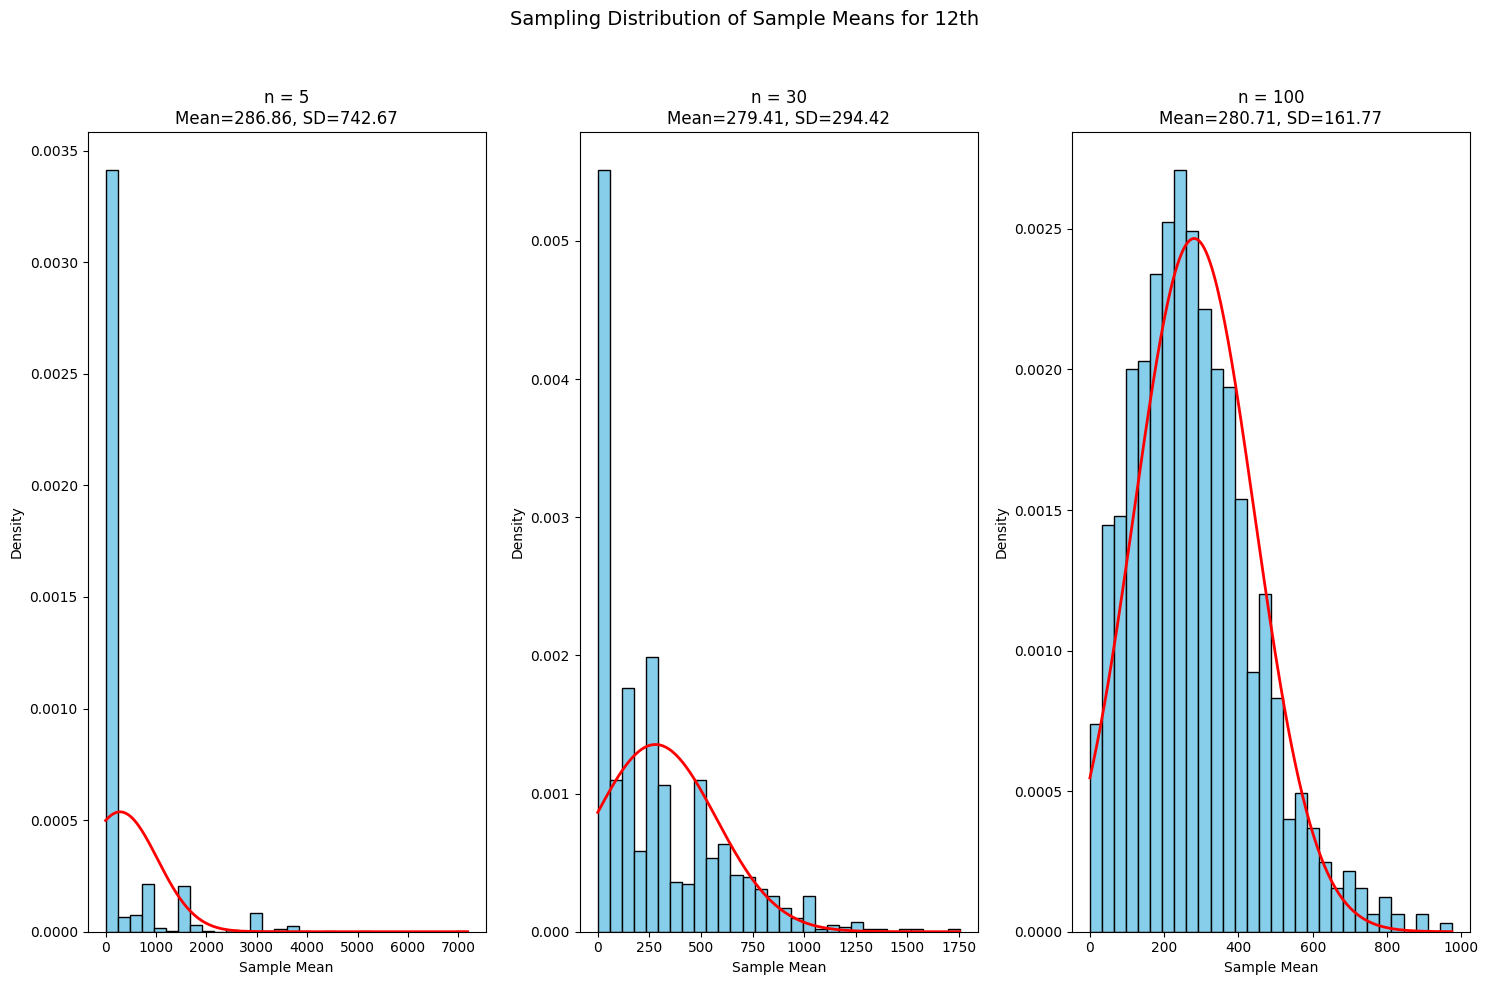

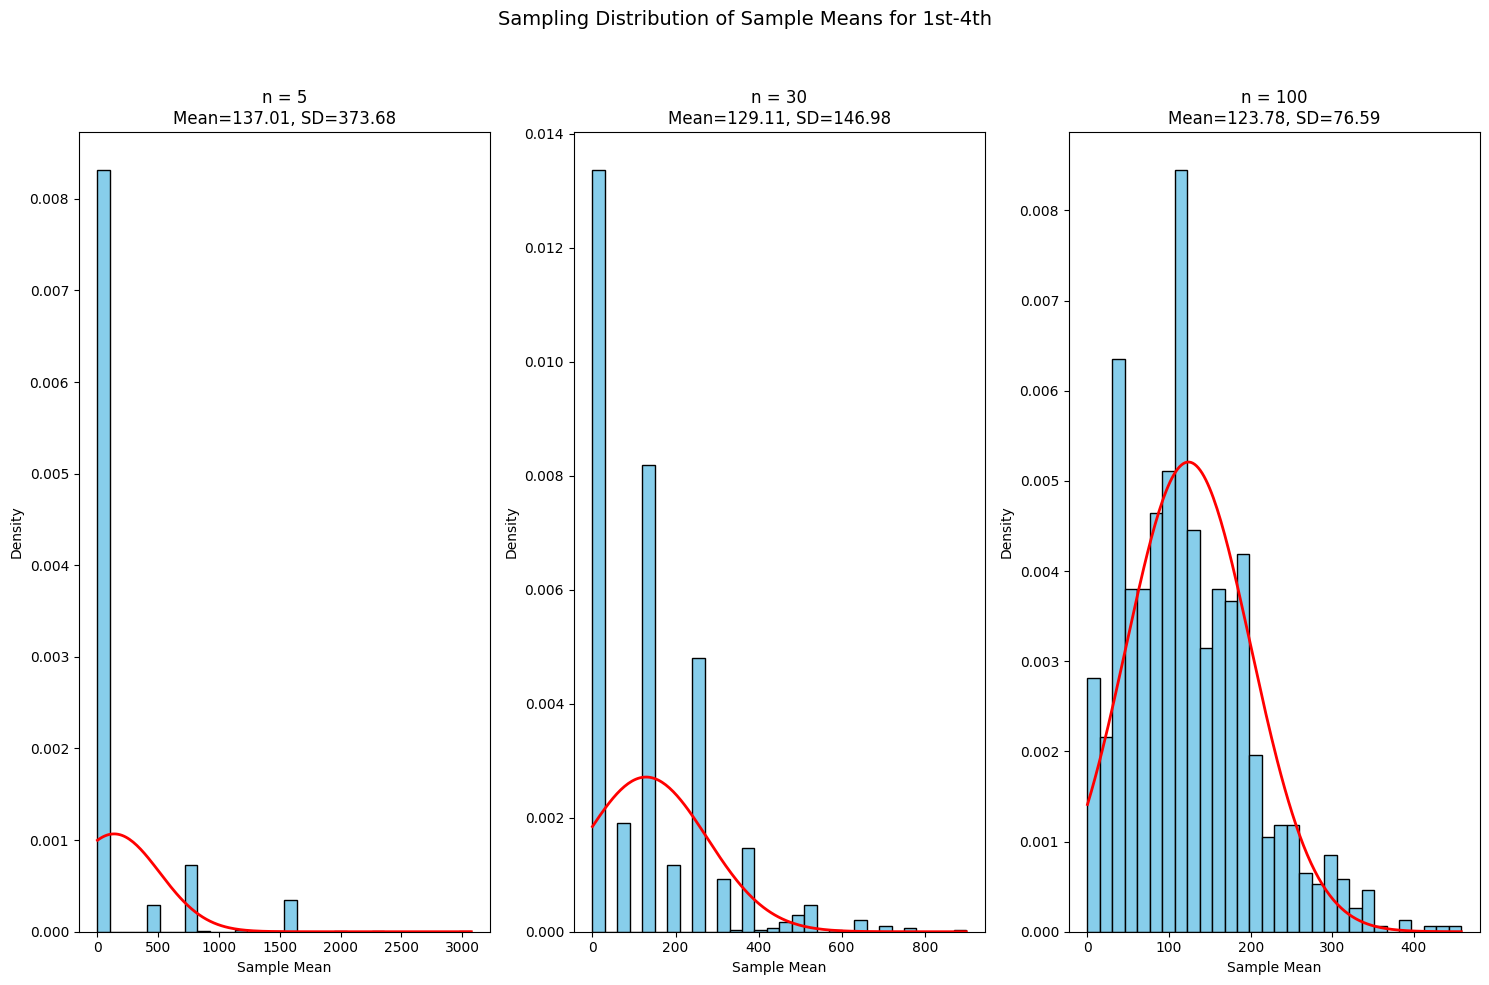

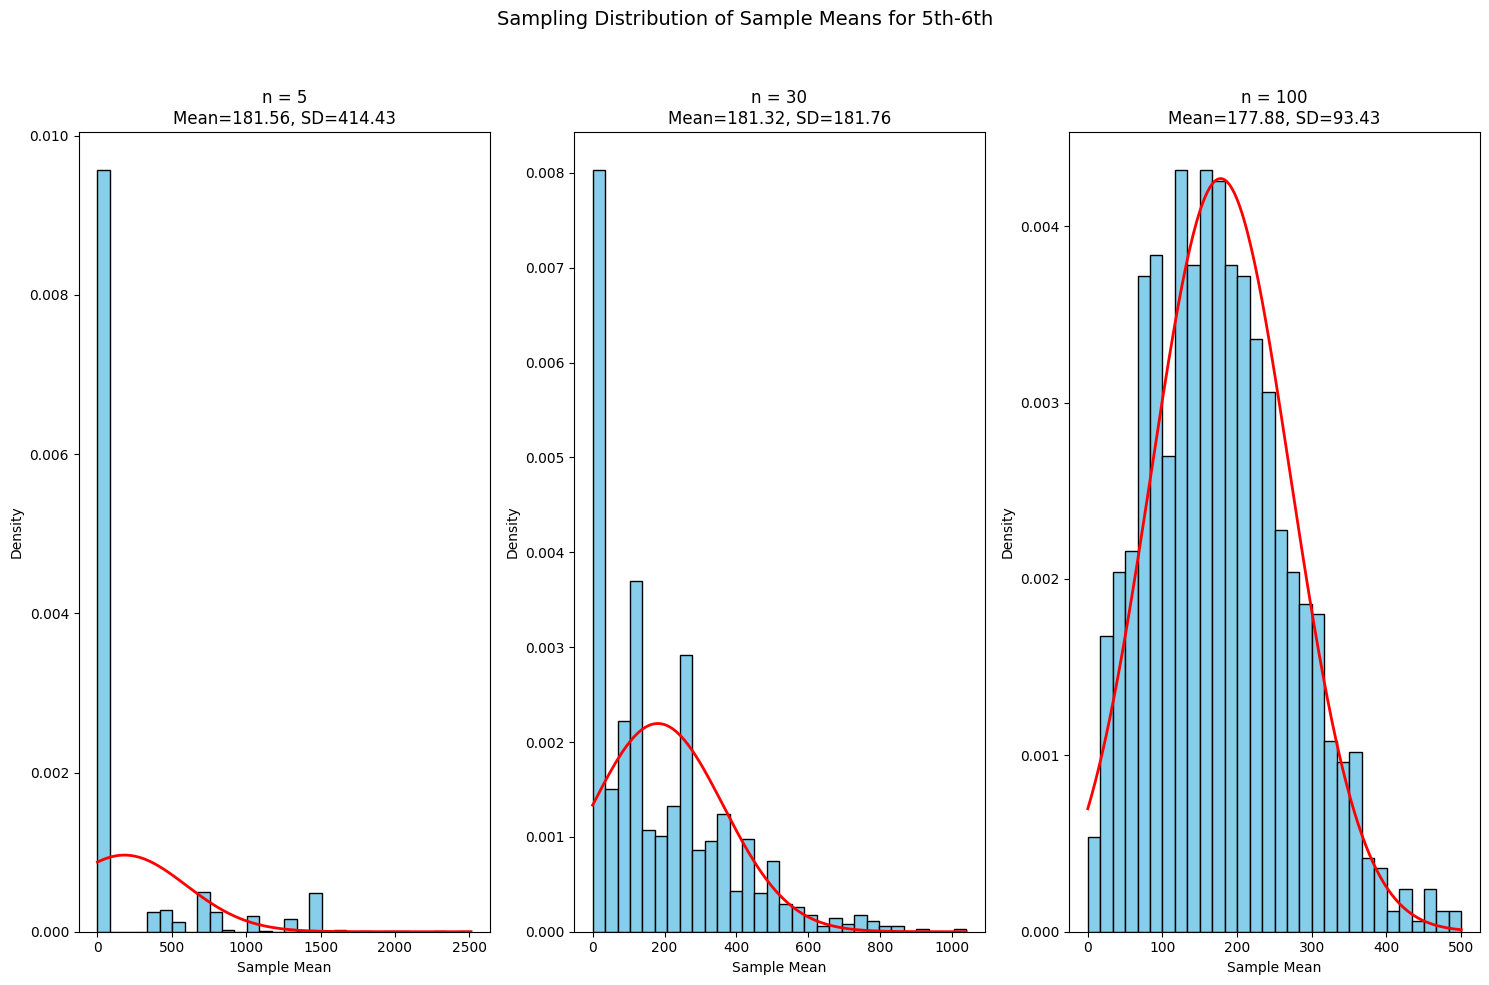

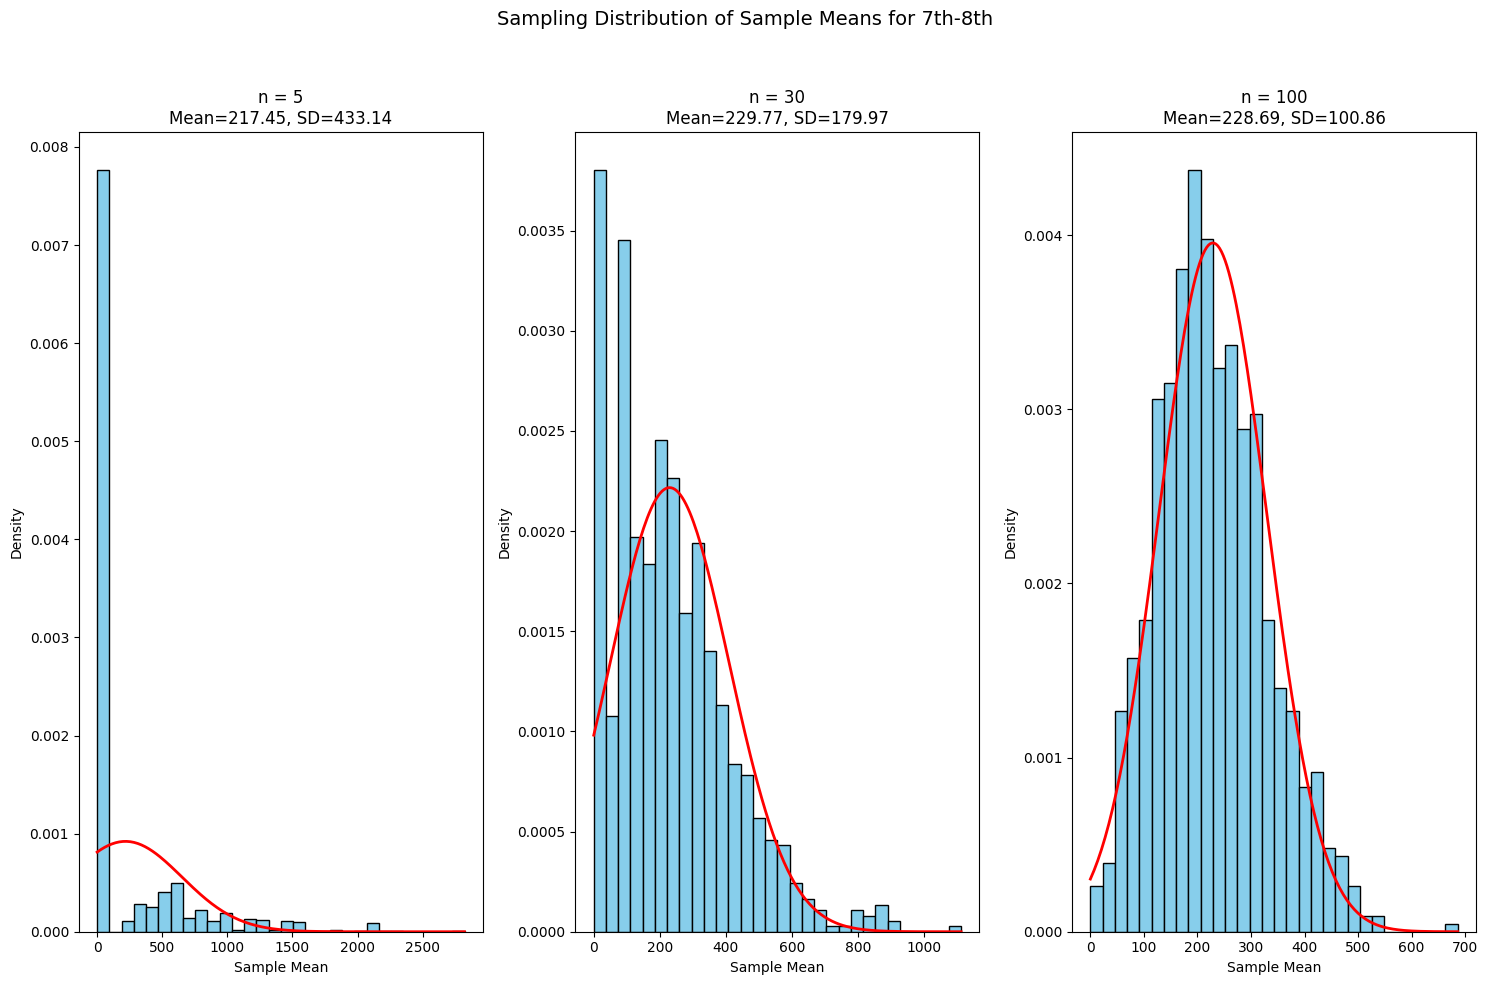

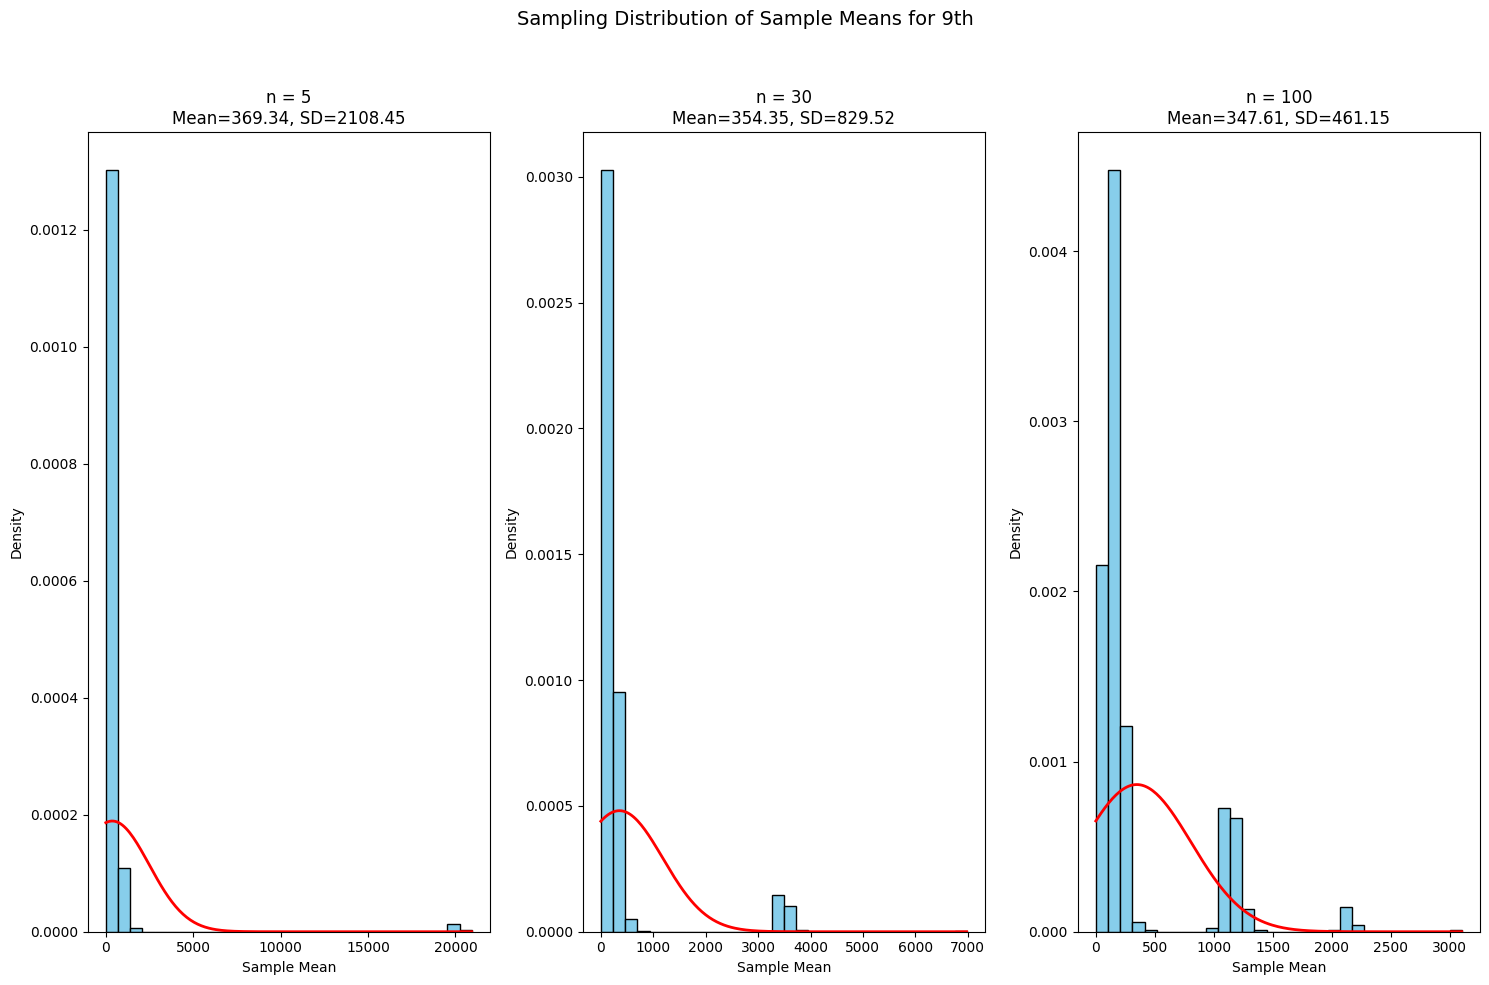

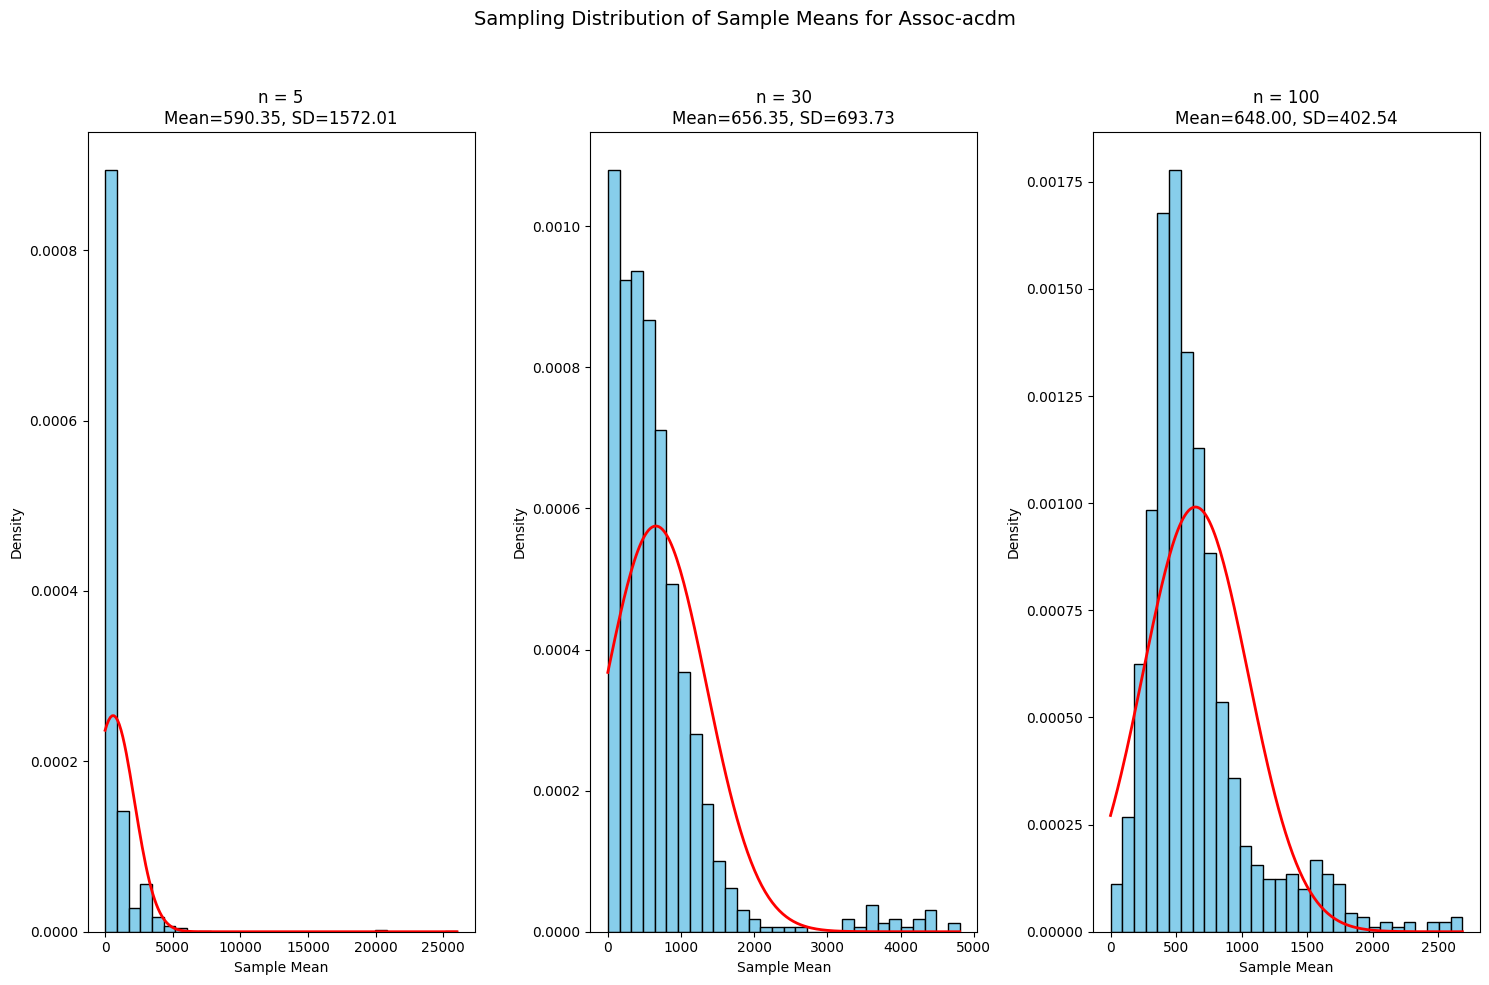

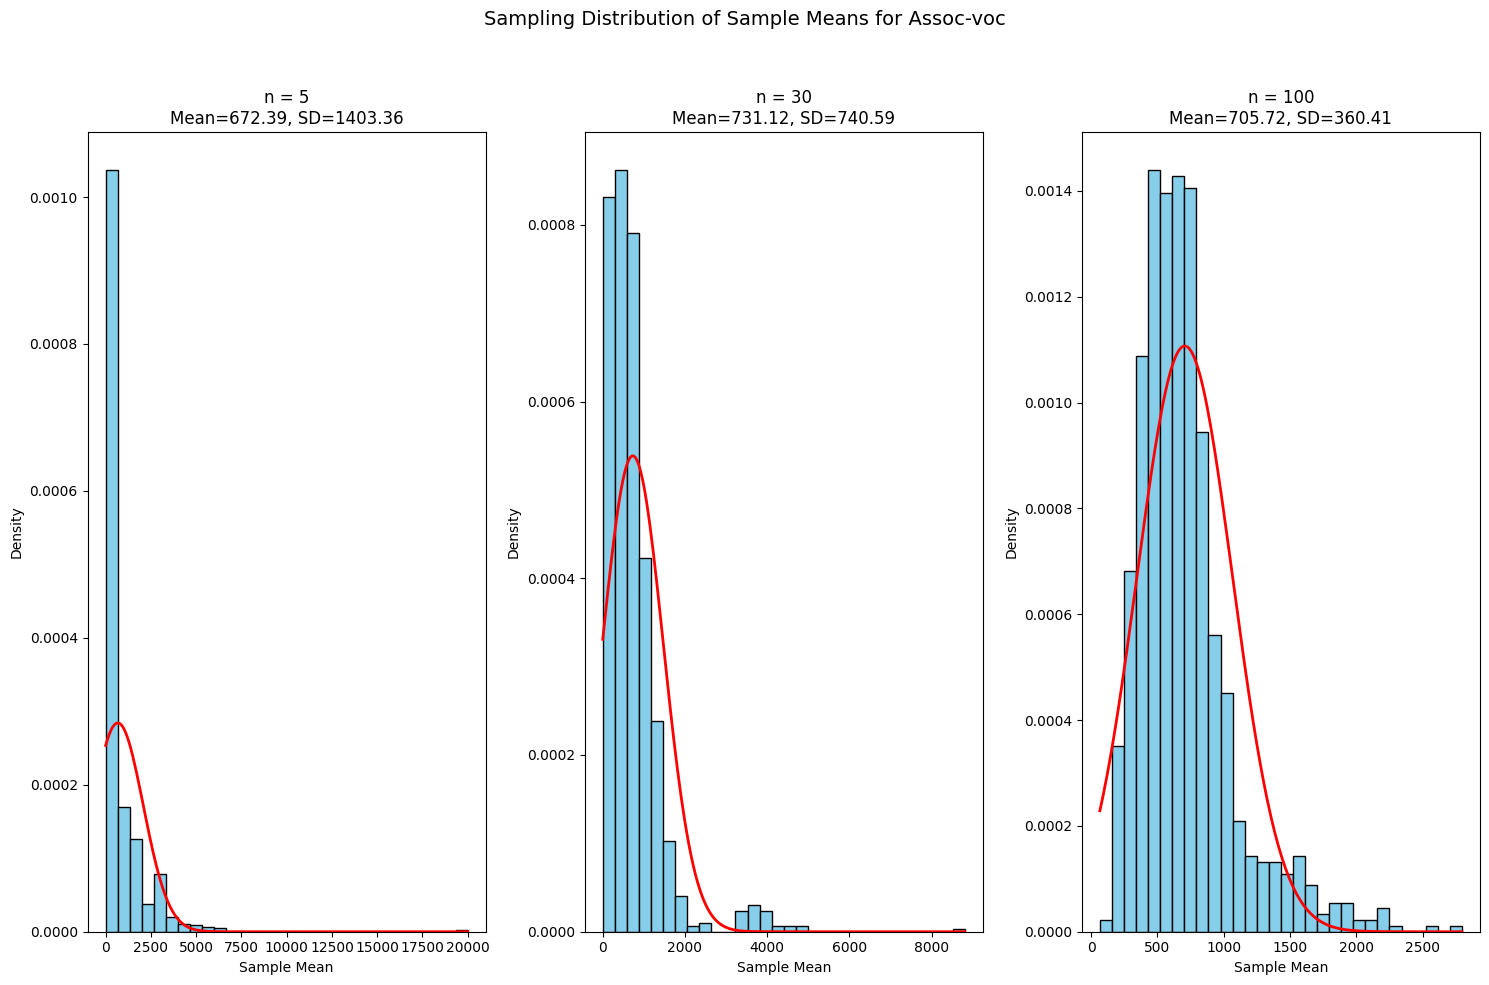

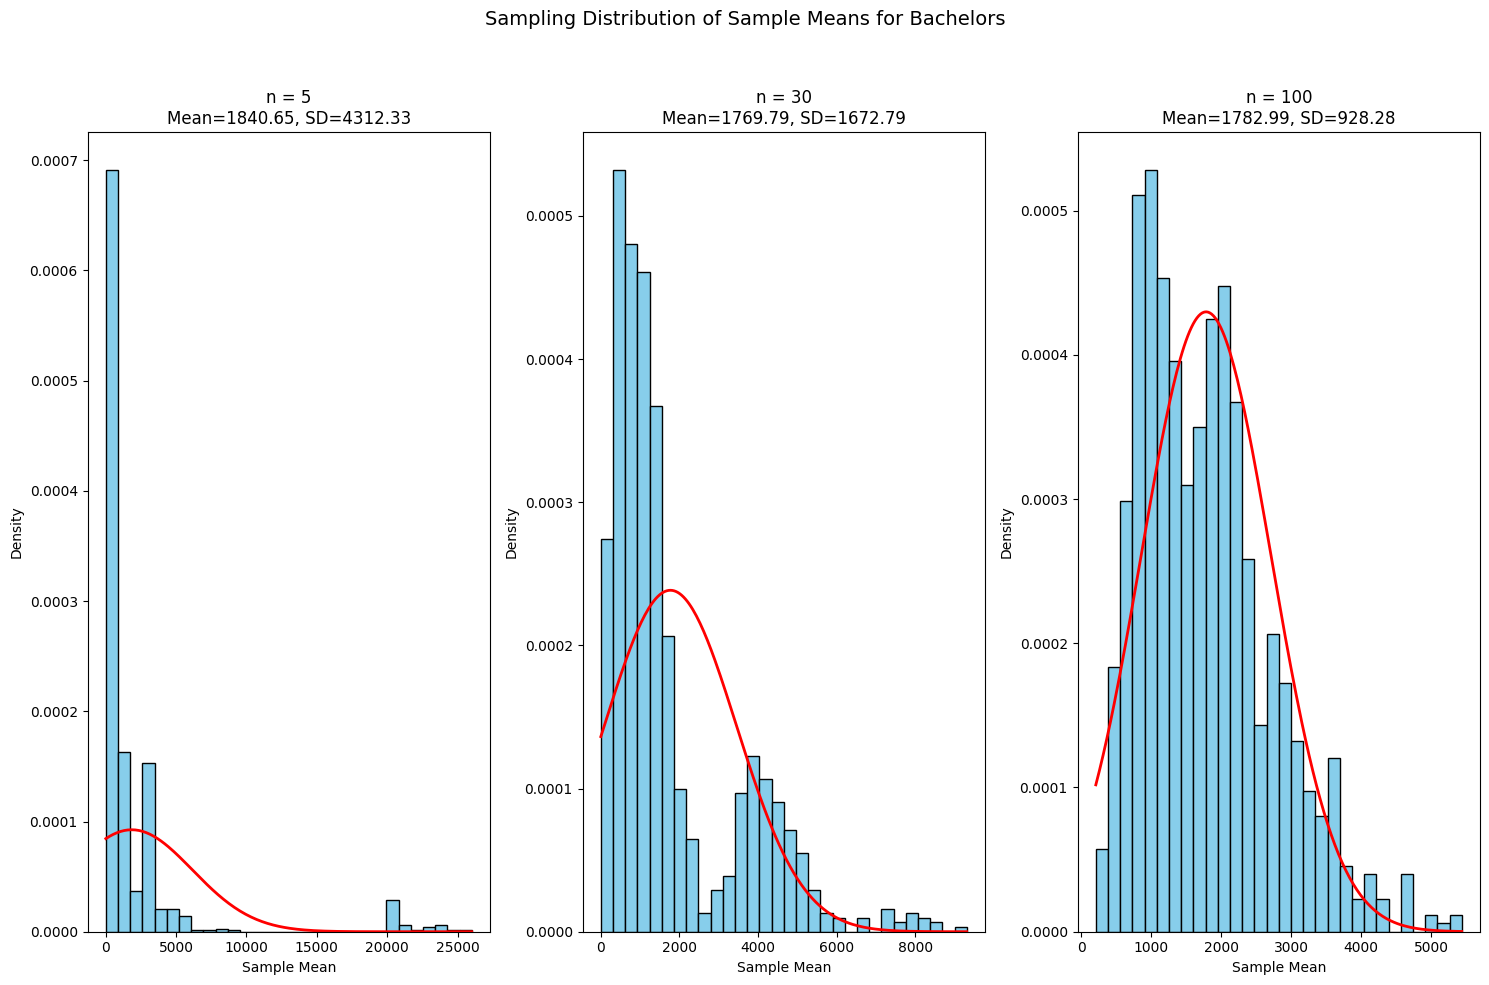

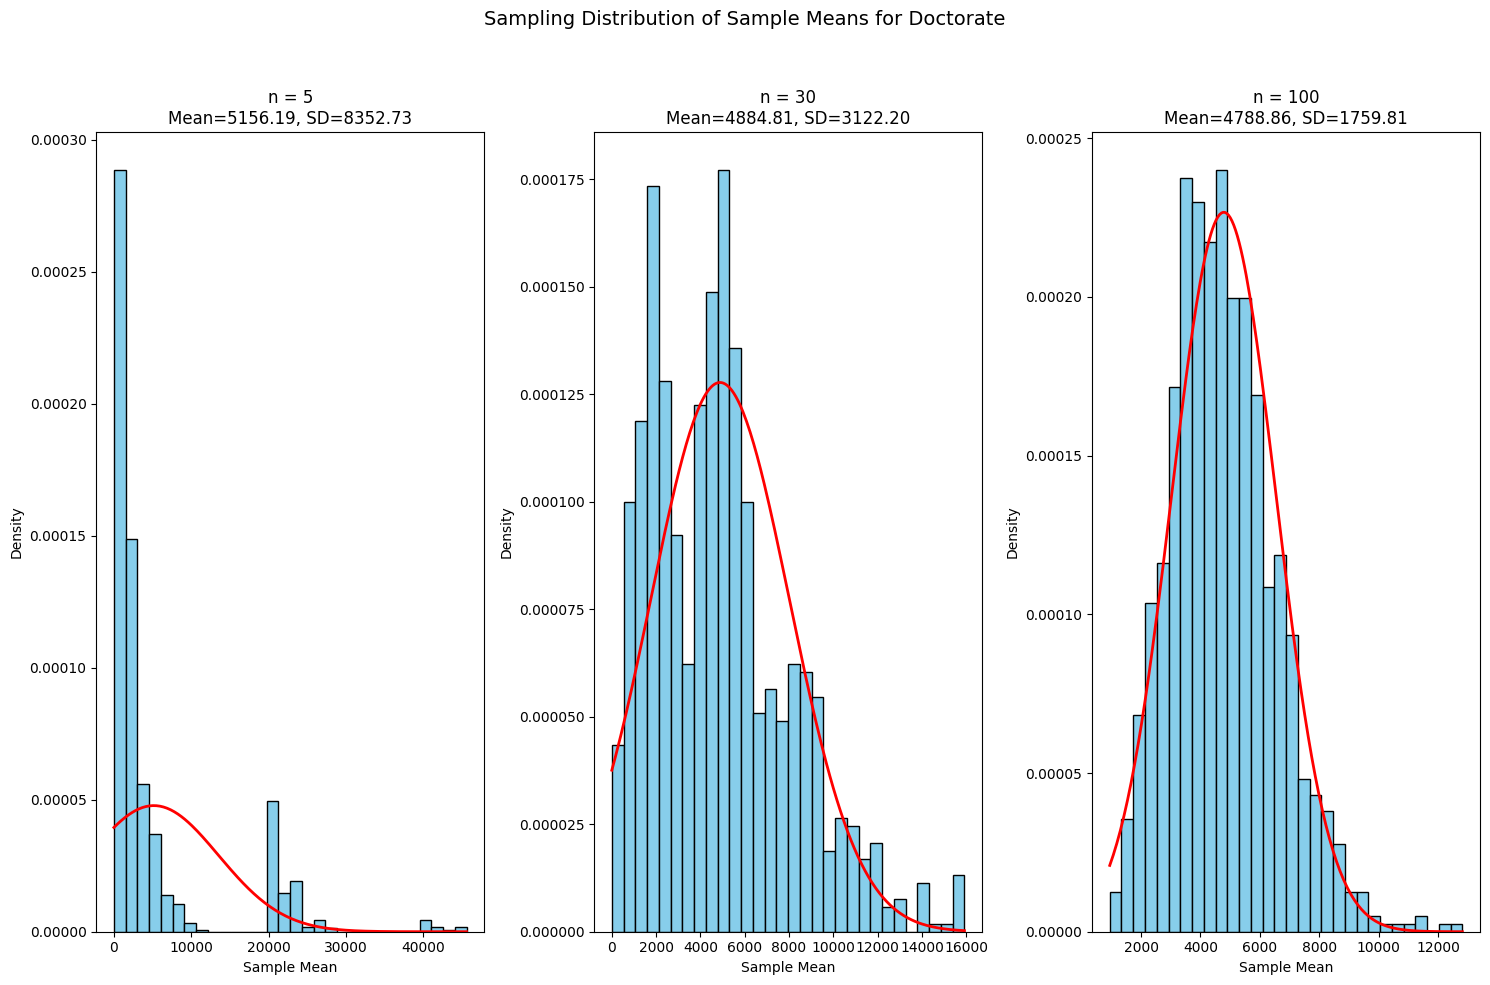

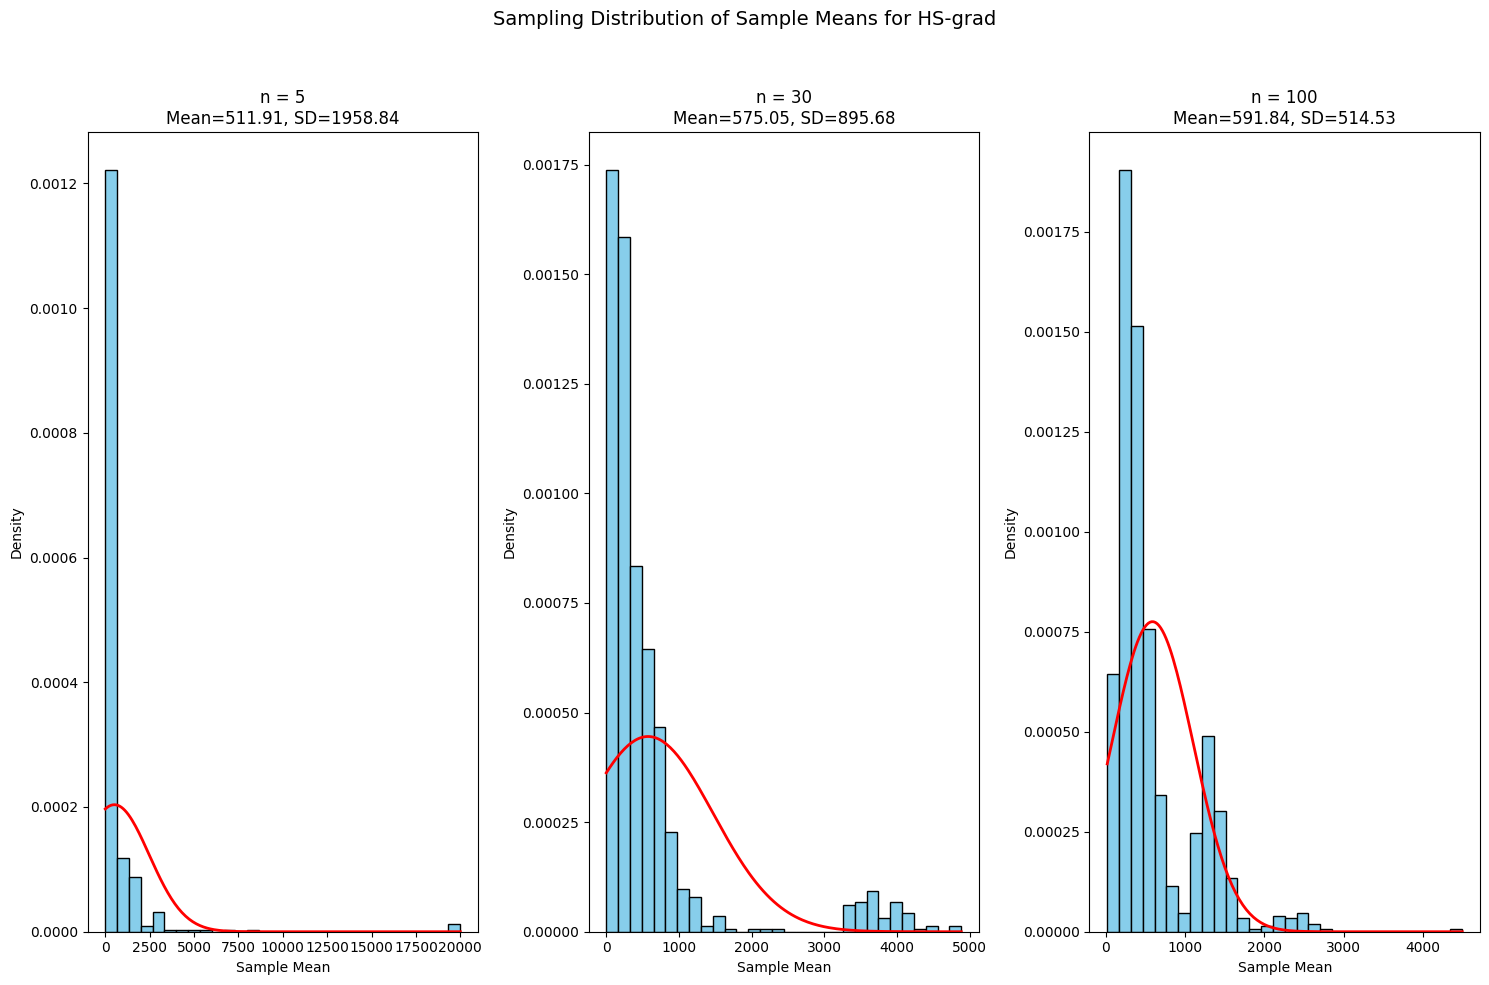

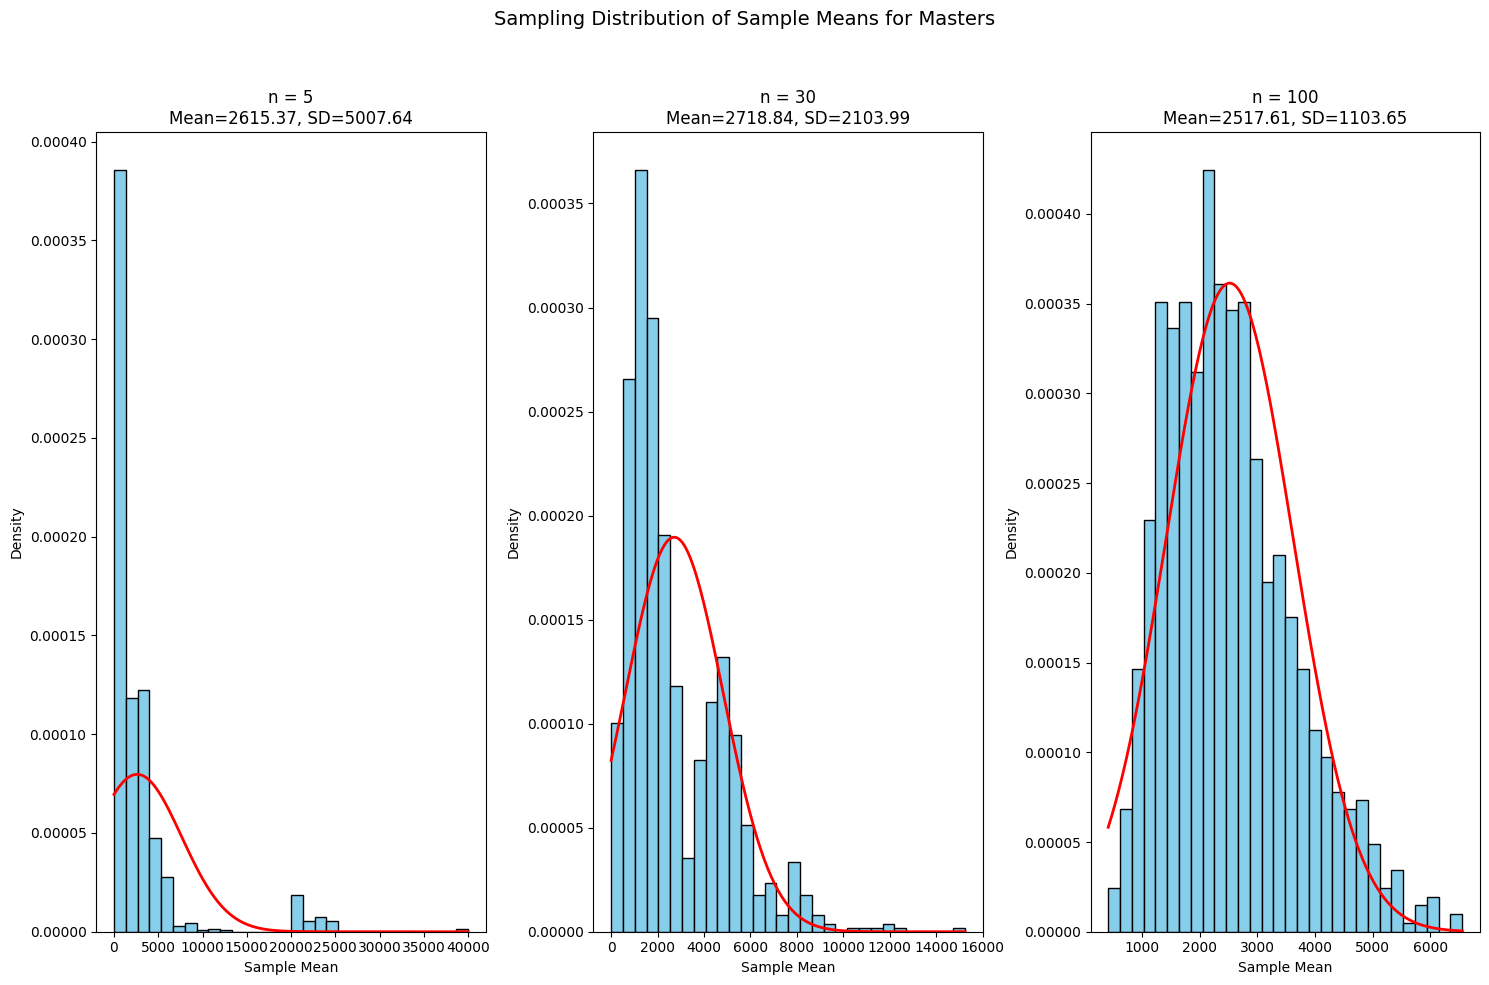

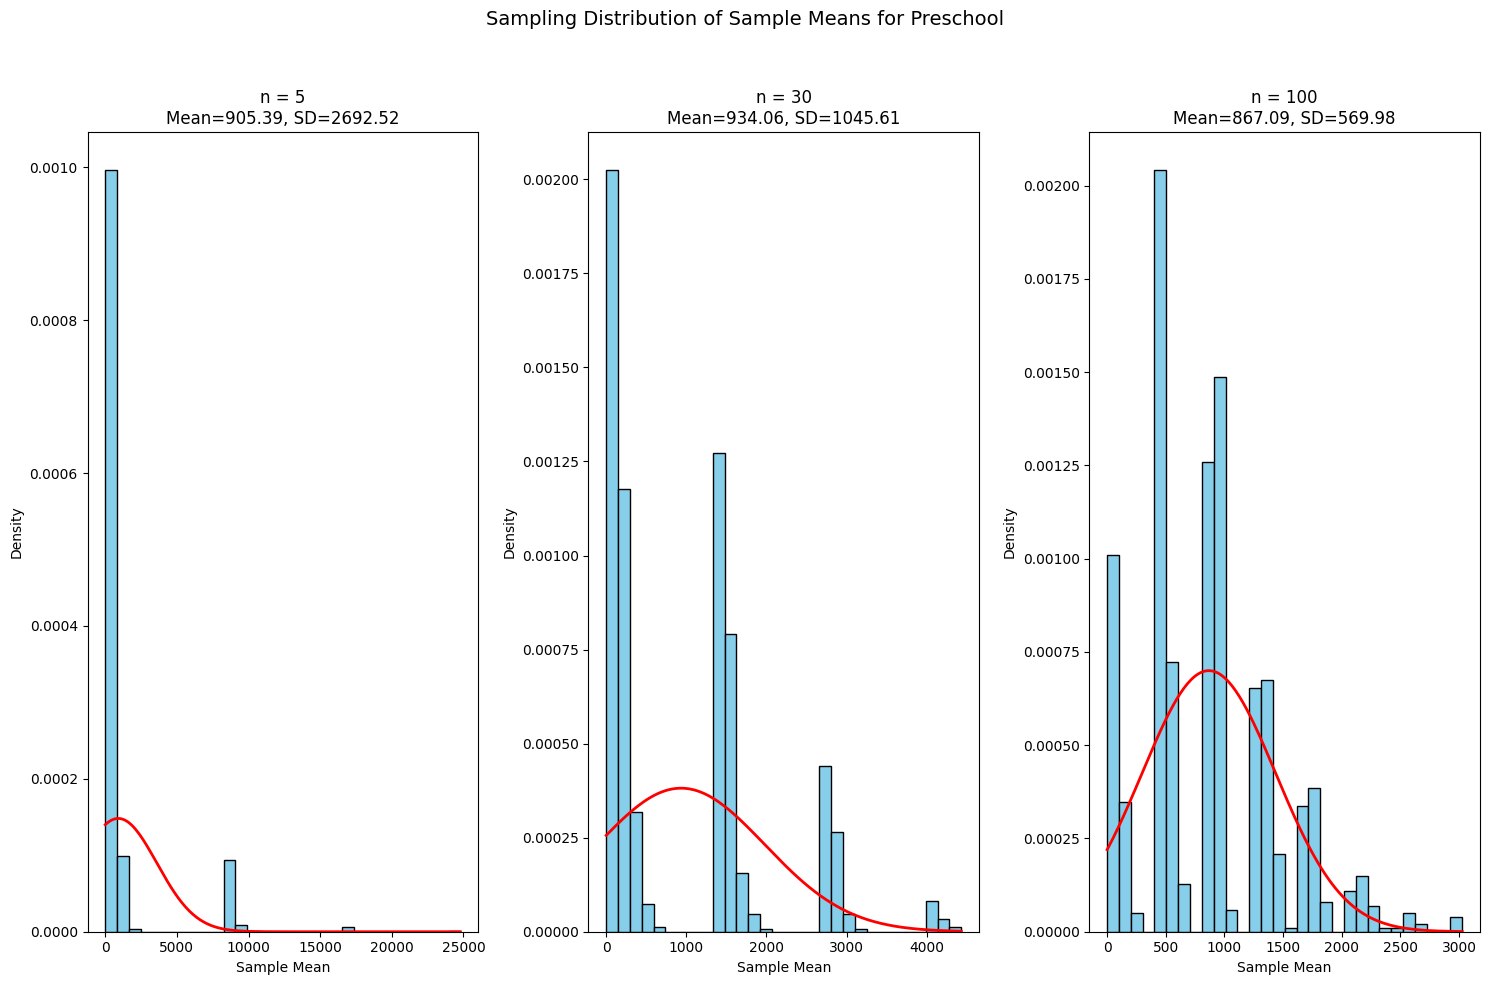

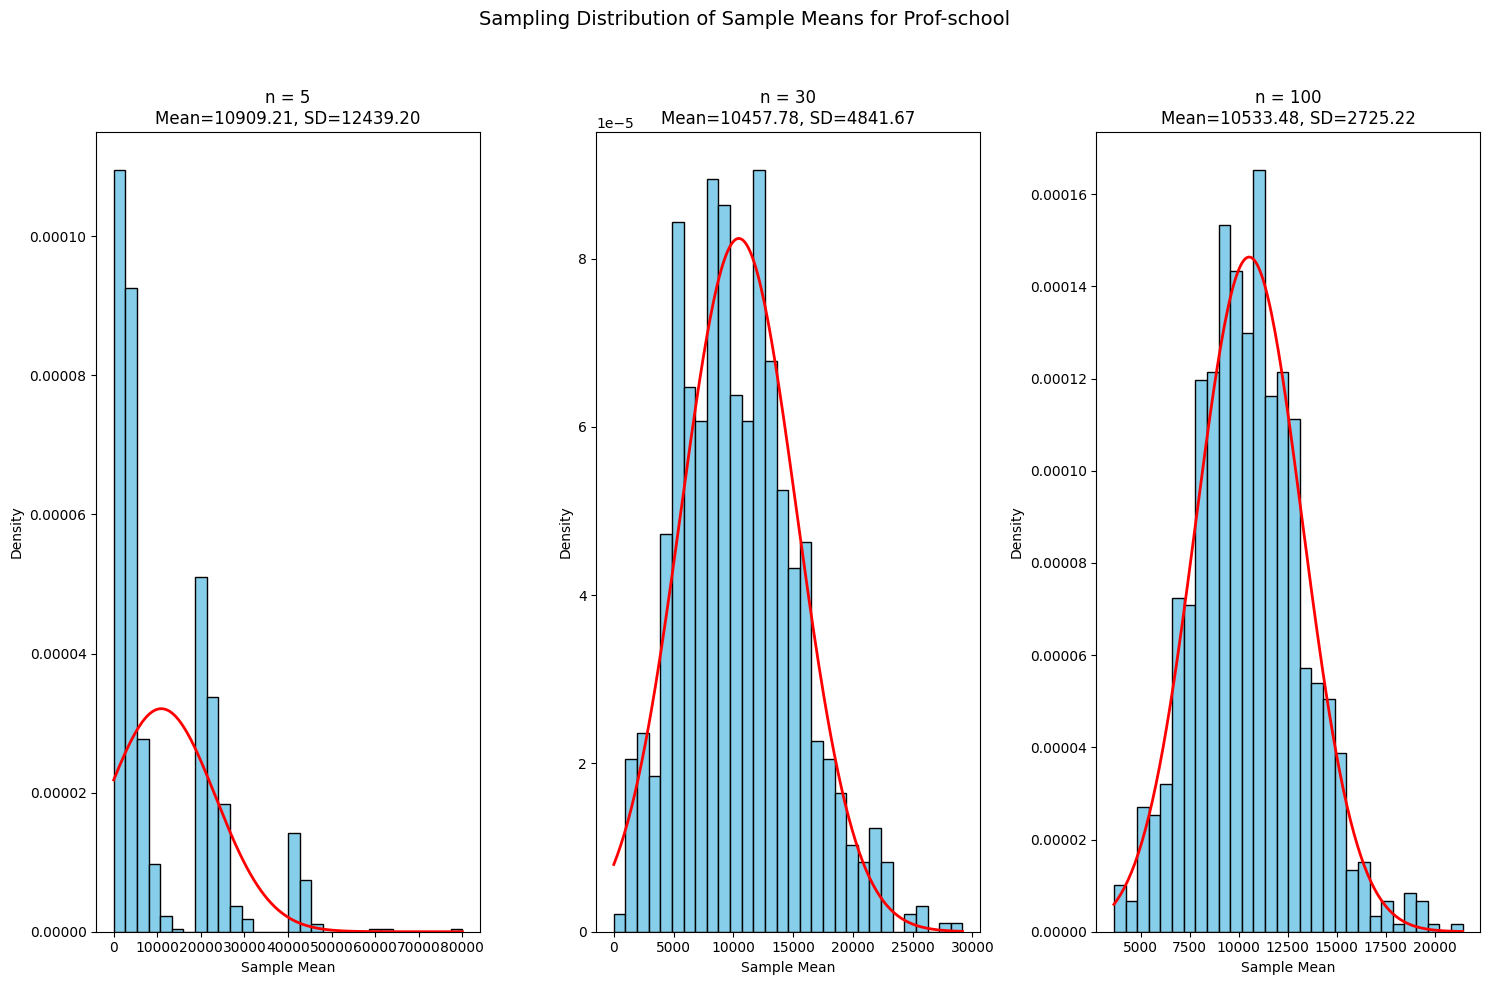

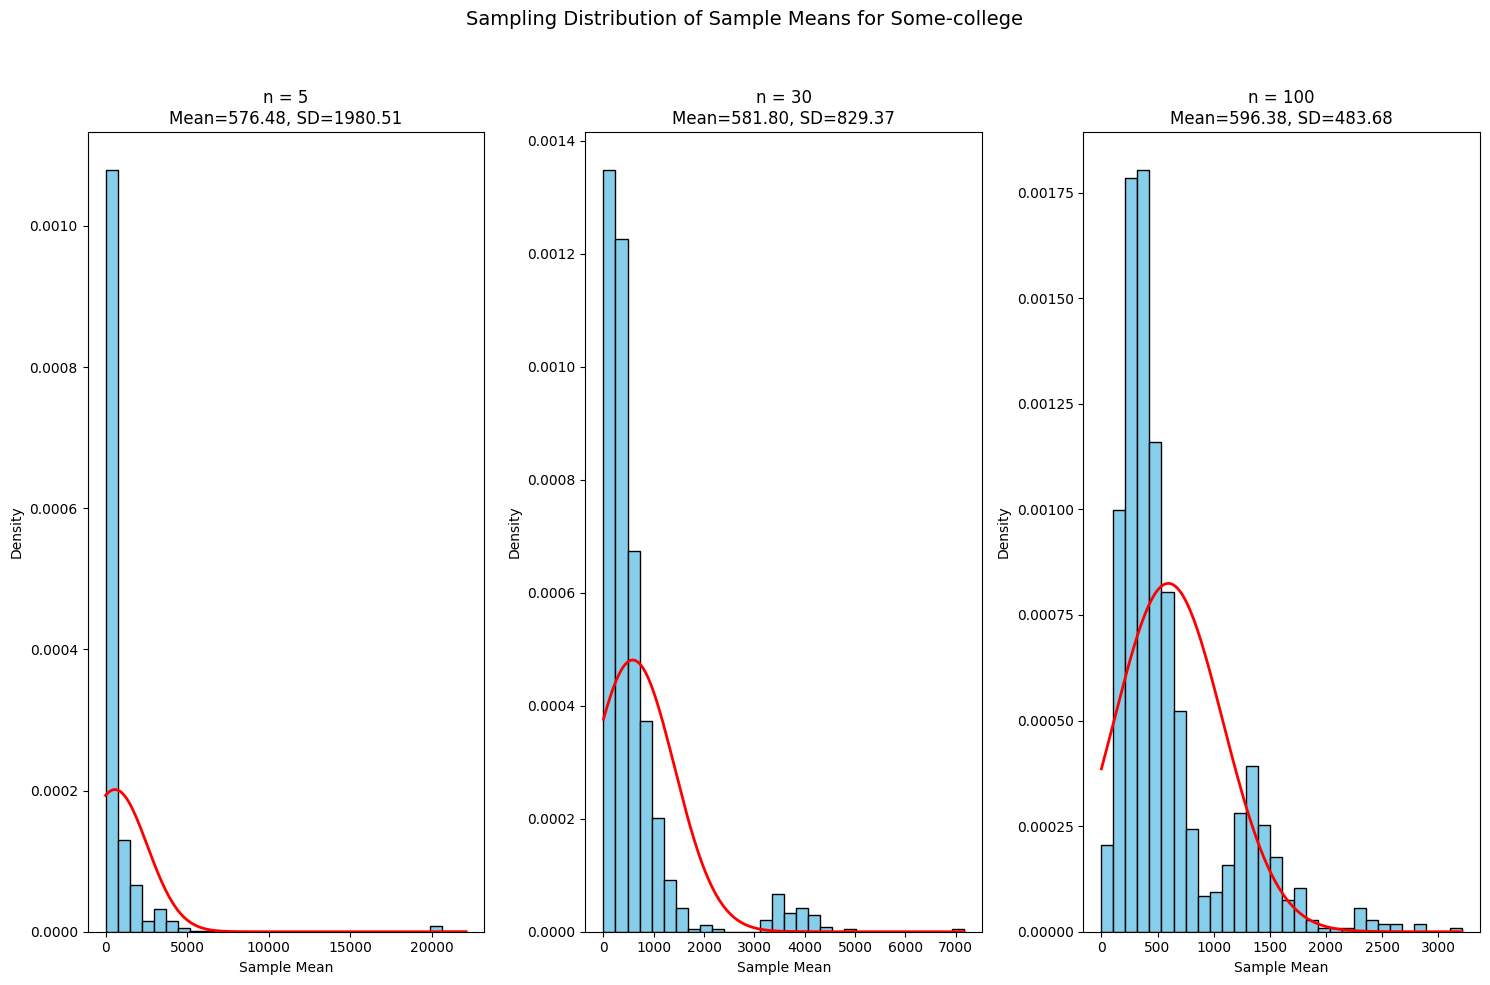

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm


# -------------------------------
# STEP 1: Load and clean dataset
# -------------------------------
# Make sure 'adult.csv' is downloaded from:
# https://www.kaggle.com/datasets/uciml/adult-census-income

df = pd.read_csv("adult.csv")

# Keep only required columns
df = df[["capital.gain", "education", "income", "hours.per.week"]]

# Clean whitespace
df["education"] = df["education"].str.strip()
df["income"] = df["income"].str.strip()

# -------------------------------
# STEP 2: Create subgroups
# -------------------------------
education_groups = df.groupby("education")

# -------------------------------
# STEP 3: Plot histograms of raw capital-gain
# -------------------------------
plt.figure(figsize=(15, 12))
for i, (edu, group) in enumerate(education_groups, start=1):
    plt.subplot(6, 3, i)
    plt.hist(group["capital.gain"], bins=20, color="skyblue", edgecolor="black")
    plt.title(f"{edu} (n={len(group)})", fontsize=8)
    plt.xlabel("Capital Gain")
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.suptitle("Histograms of Raw Capital-Gain by Education Level", fontsize=16, y=1.02)
plt.show()



# Sample sizes
sample_sizes = [5, 30, 100]

# Iterate over each education group
for edu, group in education_groups:
    data = group["capital.gain"].values

    plt.figure(figsize=(15, 10))
    plt.suptitle(f"Sampling Distribution of Sample Means for {edu}", fontsize=14)

    # For each sample size n = 5, 30, 100
    for i, n in enumerate(sample_sizes, start=1):
        sample_means = []
        for _ in range(1000):  # draw 1000 samples
            sample = np.random.choice(data, size=n, replace=True)
            sample_means.append(np.mean(sample))

        # Compute sample mean and std dev of sample means
        mean = np.mean(sample_means)
        sd = np.std(sample_means)

        # Plot histogram
        plt.subplot(1, 3, i)
        plt.hist(sample_means, bins=30, density=True, color="skyblue", edgecolor="black")

        # Overlay Normal PDF
        x = np.linspace(min(sample_means), max(sample_means), 200)
        plt.plot(x, norm.pdf(x, mean, sd), 'r', linewidth=2)
        plt.title(f"n = {n}\nMean={mean:.2f}, SD={sd:.2f}")
        plt.xlabel("Sample Mean")
        plt.ylabel("Density")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


Sample mean = 10.1814
95% CI = (9.3498, 11.0129)


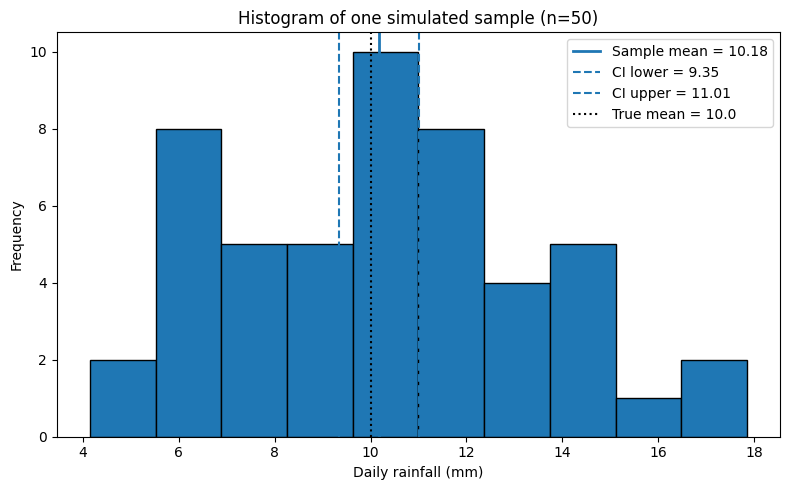

95 out of 100 intervals contained the true mean 10.0.


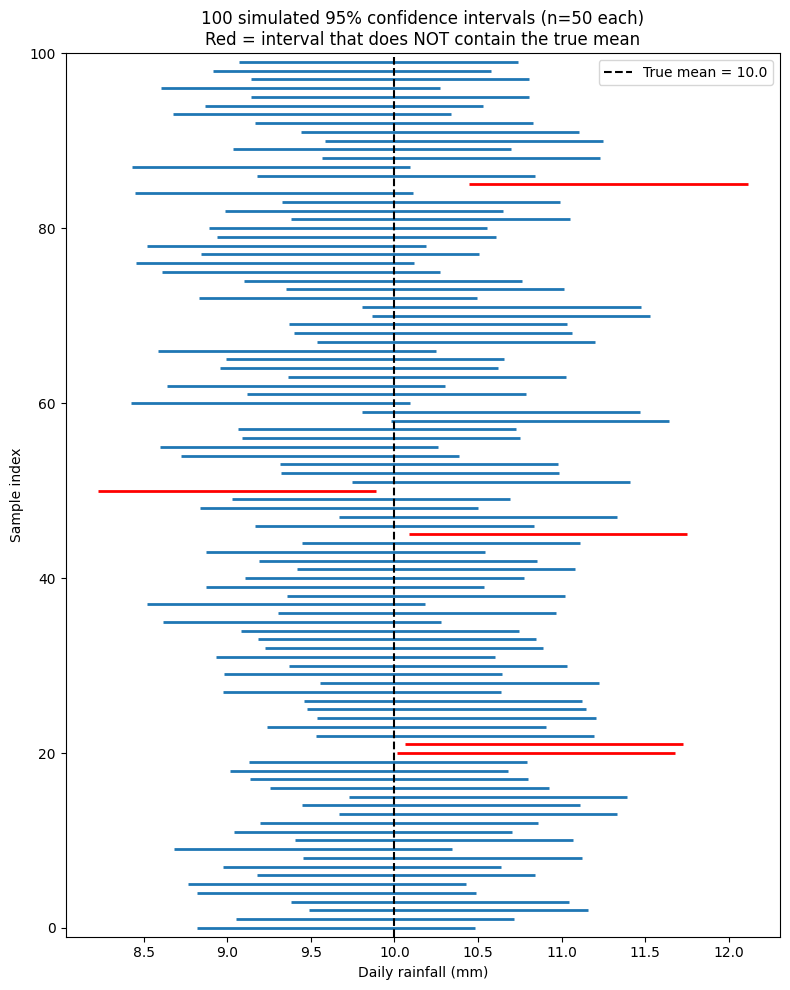

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
true_mu = 10.0
sigma = 3.0          # population standard deviation (given)
n = 50               # sample size
z = 1.96             # z_{alpha/2} for 95% CI
rng = np.random.default_rng(12345)  # reproducible RNG

# ---------- Task 1: simulate one sample ----------
sample = rng.normal(loc=true_mu, scale=sigma, size=n)

# ---------- Task 2: compute sample mean and 95% CI ----------
xbar = sample.mean()                    # sample mean (computed manually via numpy)
se = sigma / np.sqrt(n)                 # standard error using population sigma
ci_lower = xbar - z * se
ci_upper = xbar + z * se

print(f"Sample mean = {xbar:.4f}")
print(f"95% CI = ({ci_lower:.4f}, {ci_upper:.4f})")

# ---------- Task 3: histogram with annotations ----------
plt.figure(figsize=(8,5))
plt.hist(sample, bins=10, edgecolor='black')
plt.axvline(xbar, linestyle='-', linewidth=2, label=f"Sample mean = {xbar:.2f}")
plt.axvline(ci_lower, linestyle='--', linewidth=1.5, label=f"CI lower = {ci_lower:.2f}")
plt.axvline(ci_upper, linestyle='--', linewidth=1.5, label=f"CI upper = {ci_upper:.2f}")
plt.axvline(true_mu, color='k', linestyle=':', linewidth=1.5, label=f"True mean = {true_mu:.1f}")
plt.xlabel("Daily rainfall (mm)")
plt.ylabel("Frequency")
plt.title("Histogram of one simulated sample (n=50)")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- Task 4: simulate 100 samples, compute CI for each ----------
num_reps = 100
ci_list = []
contains = []

for i in range(num_reps):
    s = rng.normal(loc=true_mu, scale=sigma, size=n)
    xbar_i = s.mean()
    se_i = sigma / np.sqrt(n)
    lower = xbar_i - z * se_i
    upper = xbar_i + z * se_i
    ci_list.append((lower, upper, xbar_i))
    contains.append((lower <= true_mu <= upper))

contains_count = sum(contains)
print(f"{contains_count} out of {num_reps} intervals contained the true mean {true_mu}.")

# ---------- Task 5: plot 100 confidence intervals ----------
plt.figure(figsize=(8,10))
y_positions = np.arange(num_reps)  # 0..99

for idx, (lower, upper, xbar_i) in enumerate(ci_list):
    if lower <= true_mu <= upper:
        plt.hlines(y=idx, xmin=lower, xmax=upper, linewidth=2)           # default color (usually blue)
    else:
        plt.hlines(y=idx, xmin=lower, xmax=upper, linewidth=2, color='red')

# Add vertical reference line at the true mean
plt.axvline(true_mu, color='k', linestyle='--', label=f"True mean = {true_mu}")

plt.xlabel("Daily rainfall (mm)")
plt.ylabel("Sample index")
plt.title("100 simulated 95% confidence intervals (n=50 each)\nRed = interval that does NOT contain the true mean")
plt.ylim(-1, num_reps)
plt.legend()
plt.tight_layout()
plt.show()


Sample mean: 27.17
Z-statistic: -3.537
p-value: 0.0004
Reject H0: Average delivery time differs from 30 minutes.


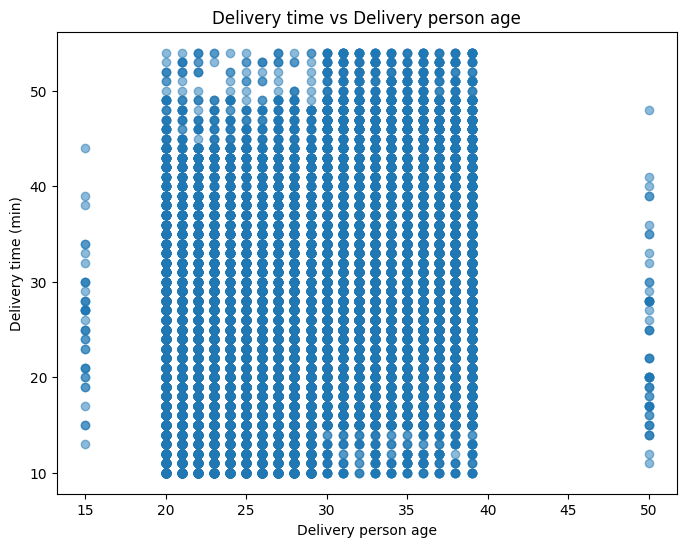

Correlation (Age vs Time): nan


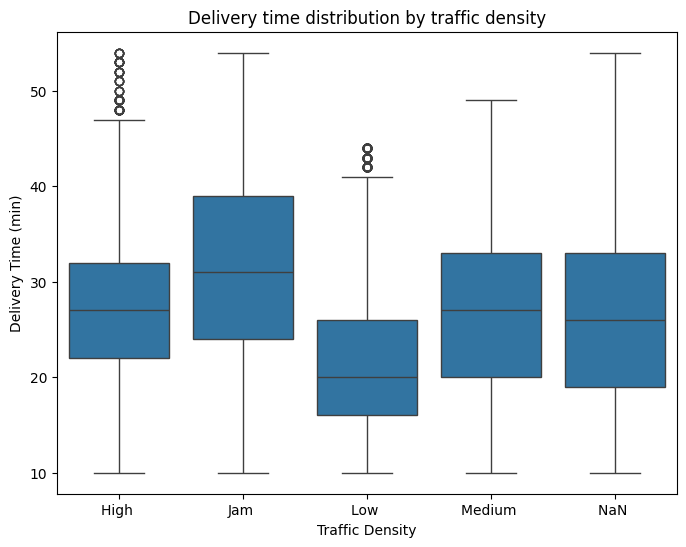


Traffic: High 
Q1=22.0, Median=27.0, Q3=32.0, IQR=10.0
Lower Whisker=7.0, Upper Whisker=47.0
Number of outliers=94

Traffic: Jam 
Q1=24.0, Median=31.0, Q3=39.0, IQR=15.0
Lower Whisker=1.5, Upper Whisker=61.5
Number of outliers=0

Traffic: Low 
Q1=16.0, Median=20.0, Q3=26.0, IQR=10.0
Lower Whisker=1.0, Upper Whisker=41.0
Number of outliers=163

Traffic: Medium 
Q1=20.0, Median=27.0, Q3=33.0, IQR=13.0
Lower Whisker=0.5, Upper Whisker=52.5
Number of outliers=0

Traffic: NaN 
Q1=19.0, Median=26.0, Q3=33.0, IQR=14.0
Lower Whisker=-2.0, Upper Whisker=54.0
Number of outliers=0


In [2]:
# --------------------------
# Food Delivery Analysis
# --------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math

# --------------------------
# 1. Load and clean dataset
# --------------------------
df = pd.read_csv("train.csv")

# Clean Time_taken(min)
df["Time_taken(min)"] = df["Time_taken(min)"].astype(str)
df["Time_taken(min)"] = df["Time_taken(min)"].str.replace(r"\(min\)\s*", "", regex=True)
df["Time_taken(min)"] = df["Time_taken(min)"].astype(float)

# Drop rows with missing delivery time
df = df.dropna(subset=["Time_taken(min)"])
df["Time_taken(min)"] = df["Time_taken(min)"].astype(float)

# --------------------------
# 2. Random sample of 100
# --------------------------
sample = df["Time_taken(min)"].sample(n=100, random_state=42)
xbar = sample.mean()
sigma = 8  # known population standard deviation
mu0 = 30
n = len(sample)

# --------------------------
# 3. One-sample Z-test
# --------------------------
z = (xbar - mu0) / (sigma / math.sqrt(n))
p_value = 2 * norm.sf(abs(z))  # two-tailed test

print("Sample mean:", round(xbar,2))
print("Z-statistic:", round(z,3))
print("p-value:", round(p_value,4))

# --------------------------
# 4. Interpretation
# --------------------------
alpha = 0.05
if p_value < alpha:
    print("Reject H0: Average delivery time differs from 30 minutes.")
else:
    print("Fail to reject H0: No evidence that average delivery time differs from 30 minutes.")

# --------------------------
# 5. Delivery time vs Delivery person age
# --------------------------
# Clean age column
df_age = df.dropna(subset=["Delivery_person_Age", "Time_taken(min)"])
df_age["Delivery_person_Age"] = df_age["Delivery_person_Age"].astype(float)

plt.figure(figsize=(8,6))
plt.scatter(df_age["Delivery_person_Age"], df_age["Time_taken(min)"], alpha=0.5)
plt.xlabel("Delivery person age")
plt.ylabel("Delivery time (min)")
plt.title("Delivery time vs Delivery person age")
plt.show()

# Optional: compute correlation
corr = np.corrcoef(df_age["Delivery_person_Age"], df_age["Time_taken(min)"])[0,1]
print("Correlation (Age vs Time):", round(corr,3))

# --------------------------
# 6. Effect of Traffic Density
# --------------------------
# Clean traffic column
df_traffic = df.dropna(subset=["Road_traffic_density", "Time_taken(min)"])

plt.figure(figsize=(8,6))
sns.boxplot(data=df_traffic, x="Road_traffic_density", y="Time_taken(min)")
plt.xlabel("Traffic Density")
plt.ylabel("Delivery Time (min)")
plt.title("Delivery time distribution by traffic density")
plt.show()

# Summary statistics for operational recommendation
traffic_levels = df_traffic["Road_traffic_density"].unique()
for level in traffic_levels:
    group = df_traffic[df_traffic["Road_traffic_density"] == level]["Time_taken(min)"]
    Q1 = group.quantile(0.25)
    Q2 = group.quantile(0.5)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 + 1.5*IQR
    outliers = group[(group < lower_whisker) | (group > upper_whisker)]
    print(f"\nTraffic: {level}")
    print(f"Q1={Q1}, Median={Q2}, Q3={Q3}, IQR={IQR}")
    print(f"Lower Whisker={lower_whisker}, Upper Whisker={upper_whisker}")
    print(f"Number of outliers={len(outliers)}")


Z-test for average delivery time
Sample mean: 27.17
Z-statistic: -3.537
p-value: 0.0004
Reject H0: Average delivery time differs from 30 minutes.



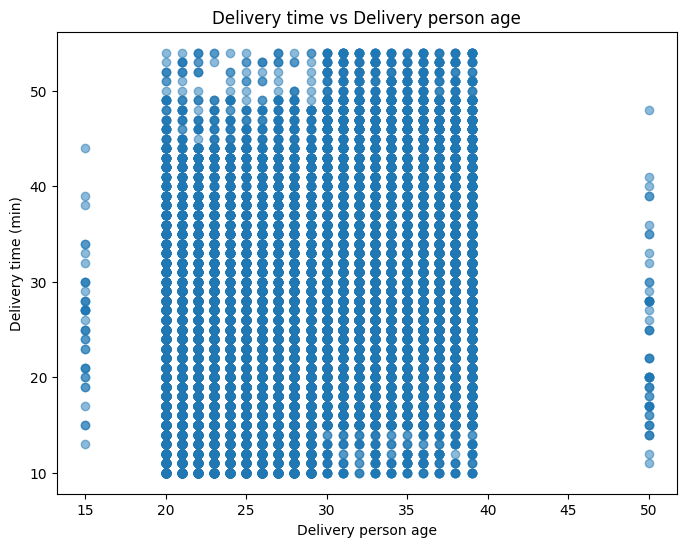

Correlation (Age vs Time): nan 

Summary statistics by Traffic Density:

                           mean  median       std  count
Road_traffic_density                                    
High                  27.240000    27.0  8.396012   4425
Jam                   31.176624    31.0  9.940904  14143
Low                   21.266977    20.0  6.799062  15477
Medium                26.699644    27.0  8.560179  10947
NaN                   26.542429    26.0  9.456847    601


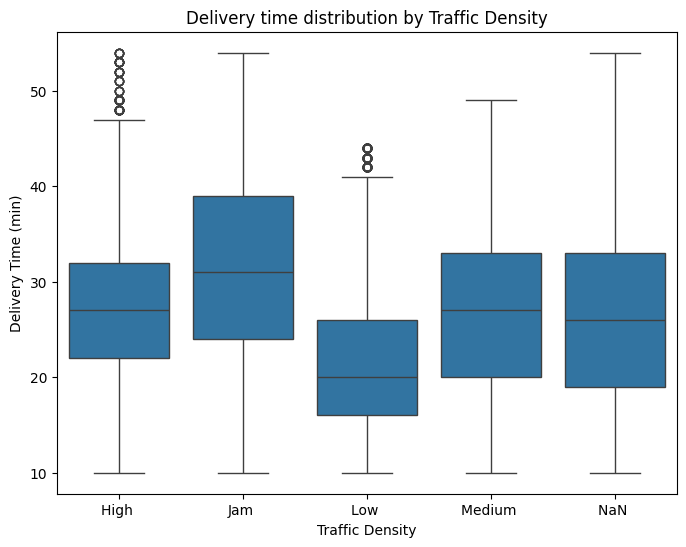

ANOVA test for delivery time vs traffic density
F-statistic: 2550.296
p-value: 0.0
Reject H0: Traffic density significantly affects delivery times.


Tukey HSD results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
  High     Jam    3.9366    0.0    3.538  4.3352   True
  High     Low    -5.973    0.0  -6.3675 -5.5785   True
  High  Medium   -0.5404 0.0032  -0.9526 -0.1281   True
  High     NaN   -0.6976 0.3218  -1.7036  0.3084  False
   Jam     Low   -9.9096    0.0 -10.1788 -9.6405   True
   Jam  Medium    -4.477    0.0  -4.7716 -4.1824   True
   Jam     NaN   -4.6342    0.0   -5.598 -3.6704   True
   Low  Medium    5.4327    0.0   5.1437  5.7217   True
   Low     NaN    5.2755    0.0   4.3134  6.2375   True
Medium     NaN   -0.1572 0.9921  -1.1267  0.8123  False
-------------------------------------------------------


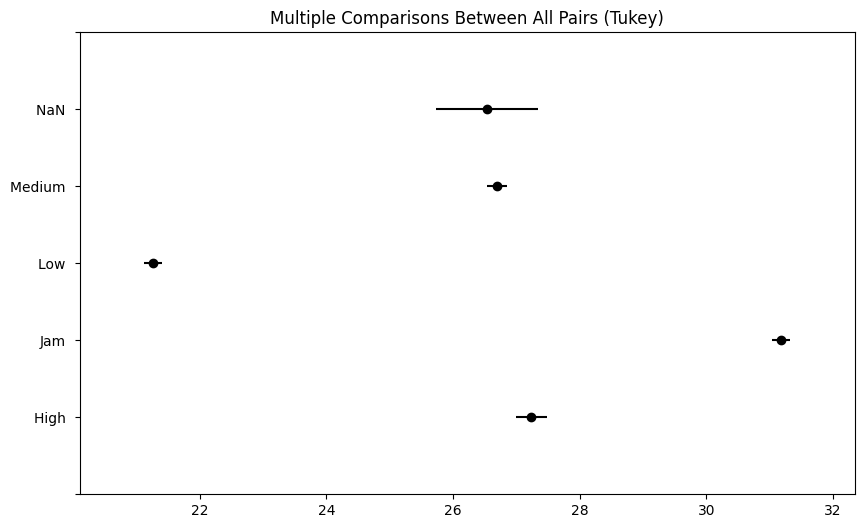

In [4]:
# -----------------------------------
# Food Delivery Performance Analysis
# -----------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, f
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# --------------------------
# 1. Load and clean dataset
# --------------------------
df = pd.read_csv("train.csv")

# Clean Time_taken(min) column
df["Time_taken(min)"] = df["Time_taken(min)"].astype(str)
df["Time_taken(min)"] = df["Time_taken(min)"].str.replace(r"\(min\)\s*", "", regex=True)
df["Time_taken(min)"] = df["Time_taken(min)"].astype(float)

# --------------------------
# 2. Random sample of 100 delivery times
# --------------------------
sample = df["Time_taken(min)"].dropna().sample(n=100, random_state=42)
xbar = sample.mean()
sigma = 8  # known population standard deviation
mu0 = 30
n = len(sample)

# --------------------------
# 3. One-sample Z-test
# --------------------------
z = (xbar - mu0) / (sigma / math.sqrt(n))
p_value = 2 * norm.sf(abs(z))  # two-tailed test

print("Z-test for average delivery time")
print("Sample mean:", round(xbar,2))
print("Z-statistic:", round(z,3))
print("p-value:", round(p_value,4))

alpha = 0.05
if p_value < alpha:
    print("Reject H0: Average delivery time differs from 30 minutes.\n")
else:
    print("Fail to reject H0: No evidence that average delivery time differs from 30 minutes.\n")

# --------------------------
# 4. Delivery time vs Delivery person age
# --------------------------
df_age = df.dropna(subset=["Delivery_person_Age", "Time_taken(min)"])
df_age["Delivery_person_Age"] = df_age["Delivery_person_Age"].astype(float)

plt.figure(figsize=(8,6))
plt.scatter(df_age["Delivery_person_Age"], df_age["Time_taken(min)"], alpha=0.5)
plt.xlabel("Delivery person age")
plt.ylabel("Delivery time (min)")
plt.title("Delivery time vs Delivery person age")
plt.show()

# Correlation
corr = np.corrcoef(df_age["Delivery_person_Age"], df_age["Time_taken(min)"])[0,1]
print("Correlation (Age vs Time):", round(corr,3), "\n")

# --------------------------
# 5. Delivery time by Traffic Density
# --------------------------
df_traffic = df.dropna(subset=["Road_traffic_density", "Time_taken(min)"])
df_traffic["Time_taken(min)"] = df_traffic["Time_taken(min)"].astype(float)

# Summary statistics
traffic_groups = df_traffic.groupby("Road_traffic_density")["Time_taken(min)"]
summary_stats = traffic_groups.agg(['mean','median','std','count'])
print("Summary statistics by Traffic Density:\n")
print(summary_stats)

# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=df_traffic, x="Road_traffic_density", y="Time_taken(min)")
plt.xlabel("Traffic Density")
plt.ylabel("Delivery Time (min)")
plt.title("Delivery time distribution by Traffic Density")
plt.show()

# --------------------------
# 6. Manual ANOVA computation
# --------------------------
levels = df_traffic["Road_traffic_density"].unique()
k = len(levels)
N = len(df_traffic)
grand_mean = df_traffic["Time_taken(min)"].mean()

# Between-group sum of squares
SSB = sum(df_traffic[df_traffic["Road_traffic_density"]==level]["Time_taken(min)"].count() *
          (df_traffic[df_traffic["Road_traffic_density"]==level]["Time_taken(min)"].mean() - grand_mean)**2
          for level in levels)

# Within-group sum of squares
SSW = sum(((df_traffic[df_traffic["Road_traffic_density"]==level]["Time_taken(min)"] - 
            df_traffic[df_traffic["Road_traffic_density"]==level]["Time_taken(min)"].mean())**2).sum()
          for level in levels)

# Degrees of freedom
df_between = k-1
df_within = N-k

# Mean squares
MSB = SSB / df_between
MSW = SSW / df_within

# F-statistic
F_stat = MSB / MSW
p_value_anova = f.sf(F_stat, df_between, df_within)

print("ANOVA test for delivery time vs traffic density")
print("F-statistic:", round(F_stat,3))
print("p-value:", round(p_value_anova,4))

if p_value_anova < 0.05:
    print("Reject H0: Traffic density significantly affects delivery times.\n")
else:
    print("Fail to reject H0: No significant effect of traffic density.\n")

# --------------------------
# 7. Tukey HSD test
# --------------------------
# Optional: adjust dataset if ANOVA fails to illustrate Tukey
if p_value_anova >= 0.05:
    df_adjusted = df_traffic.copy()
    # Example: increase "Jam" traffic times by 5 minutes
    df_adjusted.loc[df_adjusted["Road_traffic_density"]=="Jam","Time_taken(min)"] += 5
    tukey = pairwise_tukeyhsd(endog=df_adjusted["Time_taken(min)"],
                              groups=df_adjusted["Road_traffic_density"],
                              alpha=0.05)
else:
    tukey = pairwise_tukeyhsd(endog=df_traffic["Time_taken(min)"],
                              groups=df_traffic["Road_traffic_density"],
                              alpha=0.05)

print("\nTukey HSD results:")
print(tukey)
tukey.plot_simultaneous()
plt.show()
